In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px


In [2]:
df=pd.read_csv("fraudTrain.csv")

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
df

Unnamed: 0 trans_date_trans_time               cc_num  \
0                 0   2019-01-01 00:00:18     2703186189652095   
1                 1   2019-01-01 00:00:44         630423337322   
2                 2   2019-01-01 00:00:51       38859492057661   
3                 3   2019-01-01 00:01:16     3534093764340240   
4                 4   2019-01-01 00:03:06      375534208663984   
...             ...                   ...                  ...   
1296670     1296670   2020-06-21 12:12:08       30263540414123   
1296671     1296671   2020-06-21 12:12:19     6011149206456997   
1296672     1296672   2020-06-21 12:12:32     3514865930894695   
1296673     1296673   2020-06-21 12:13:36     2720012583106919   
1296674     1296674   2020-06-21 12:13:37  4292902571056973207   

                                    merchant       category     amt  \
0                 fraud_Rippin, Kub and Mann       misc_net    4.97   
1            fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2                       fraud_Lind-Buckridge  entertainment  220.11   
3         fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
4                        fraud_Keeling-Crist       misc_pos   41.96   
...                                      ...            ...     ...   
1296670                    fraud_Reichel Inc  entertainment   15.56   
1296671             fraud_Abernathy and Sons    food_dining   51.70   
1296672                 fraud_Stiedemann Ltd    food_dining  105.93   
1296673  fraud_Reinger, Weissnat and Strosin    food_dining   74.90   
1296674  fraud_Langosh, Wintheiser and Hyatt    food_dining    4.30   

               first       last gender                         street  \
0           Jennifer      Banks      F                 561 Perry Cove   
1          Stephanie       Gill      F   43039 Riley Greens Suite 393   
2             Edward    Sanchez      M       594 White Dale Suite 530   
3             Jeremy      White      M    9443 Cynthia Court Apt. 038   
4              Tyler     Garcia      M               408 Bradley Rest   
...              ...        ...    ...                            ...   
1296670         Erik  Patterson      M       162 Jessica Row Apt. 072   
1296671      Jeffrey      White      M  8617 Holmes Terrace Suite 651   
1296672  Christopher  Castaneda      M     1632 Cohen Drive Suite 639   
1296673       Joseph     Murray      M           42933 Ryan Underpass   
1296674      Jeffrey      Smith      M           135 Joseph Mountains   

                             city state    zip      lat      long  city_pop  \
0                  Moravian Falls    NC  28654  36.0788  -81.1781      3495   
1                          Orient    WA  99160  48.8878 -118.2105       149   
2                      Malad City    ID  83252  42.1808 -112.2620      4154   
3                         Boulder    MT  59632  46.2306 -112.1138      1939   
4                        Doe Hill    VA  24433  38.4207  -79.4629        99   
...                           ...   ...    ...      ...       ...       ...   
1296670                     Hatch    UT  84735  37.7175 -112.4777       258   
1296671                 Tuscarora    MD  21790  39.2667  -77.5101       100   
1296672  High Rolls Mountain Park    NM  88325  32.9396 -105.8189       899   
1296673                 Manderson    SD  57756  43.3526 -102.5411      1126   
1296674                      Sula    MT  59871  45.8433 -113.8748       218   

                                       job         dob  \
0                Psychologist, counselling  1988-03-09   
1        Special educational needs teacher  1978-06-21   
2              Nature conservation officer  1962-01-19   
3                          Patent attorney  1967-01-12   
4           Dance movement psychotherapist  1986-03-28   
...                                    ...         ...   
1296670                       Geoscientist  1961-11-24   
1296671   Production assistant, television  1979-12-11   
1296672        

In [5]:
df.shape

(1296675, 23)

<Axes: xlabel='is_fraud', ylabel='Count'>

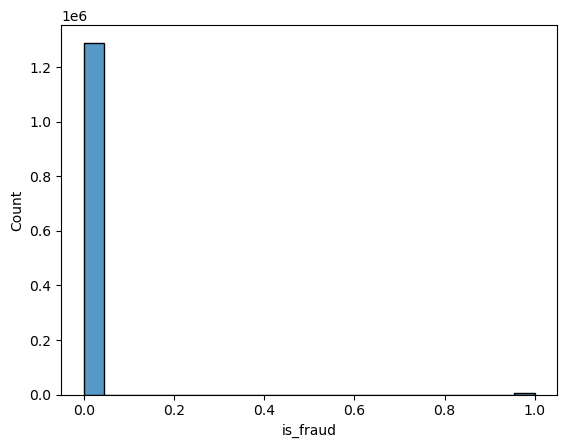

In [6]:
sns.histplot(x="is_fraud",data=df)

In [7]:
df["is_fraud"].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [8]:
# Fraud transactions (is_fraud == 1)
fraud_df = df[df['is_fraud'] == 1]

# Non-fraud transactions (is_fraud == 0)
non_fraud_df = df[df['is_fraud'] == 0]

# Non-fraud rows ko fraud rows ke barabar random select karna
balanced_non_fraud_df = non_fraud_df.sample(n=len(fraud_df), random_state=42)

# Ab fraud aur balanced non-fraud rows ko concatenate karna
df = pd.concat([fraud_df, balanced_non_fraud_df])





<Axes: xlabel='is_fraud', ylabel='Count'>

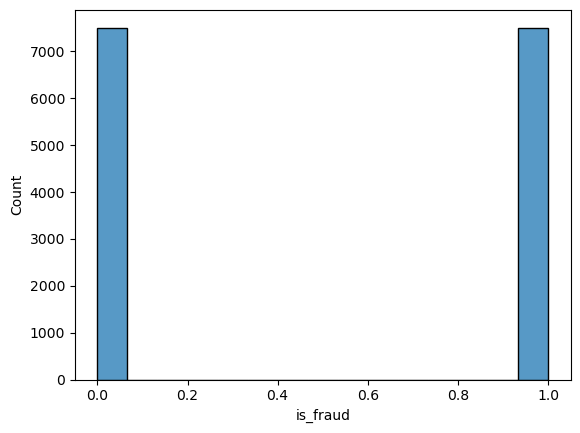

In [9]:
sns.histplot(x="is_fraud",data=df)

In [10]:
df.shape

(15012, 23)

In [11]:
df["is_fraud"].value_counts()

is_fraud
1    7506
0    7506
Name: count, dtype: int64

In [12]:
df.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.501200e+04  1.501200e+04  15012.000000  15012.000000  15012.000000   
mean   6.365042e+05  4.145026e+17    299.517998  48731.356248     38.620164   
std    3.873911e+05  1.301544e+18    373.915804  27126.671123      5.128513   
min    5.500000e+02  6.041621e+10      1.000000   1257.000000     20.027100   
25%    2.839260e+05  1.800400e+14     20.497500  25442.000000     34.778900   
50%    6.382690e+05  3.523898e+15     89.545000  47869.000000     39.405500   
75%    9.813065e+05  4.642255e+15    477.102500  72042.000000     42.015800   
max    1.296552e+06  4.992346e+18   6337.250000  99783.000000     66.693300   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  15012.000000  1.501200e+04  1.501200e+04  15012.000000  15012.000000   
mean     -90.275251  9.051075e+04  1.348818e+09     38.612480    -90.275455   
std       14.084930  3.035544e+05  1.332573e+07      5.168227     14.105491   
min     -165.672300  2.300000e+01  1.325402e+09     19.041880   -166.550779   
25%      -96.983700  7.430000e+02  1.337471e+09     34.896843    -96.989761   
50%      -87.410100  2.526000e+03  1.348876e+09     39.403182    -87.360104   
75%      -80.128400  2.112500e+04  1.359844e+09     41.991035    -80.168734   
max      -67.950300  2.906700e+06  1.371813e+09     67.510267    -67.027467   

           is_fraud  
count  15012.000000  
mean       0.500000  
std        0.500017  
min        0.000000  
25%        0.000000  
50%        0.500000  
75%        1.000000  
max        1.000000

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15012 entries, 2449 to 566921
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15012 non-null  int64  
 1   trans_date_trans_time  15012 non-null  object 
 2   cc_num                 15012 non-null  int64  
 3   merchant               15012 non-null  object 
 4   category               15012 non-null  object 
 5   amt                    15012 non-null  float64
 6   first                  15012 non-null  object 
 7   last                   15012 non-null  object 
 8   gender                 15012 non-null  object 
 9   street                 15012 non-null  object 
 10  city                   15012 non-null  object 
 11  state                  15012 non-null  object 
 12  zip                    15012 non-null  int64  
 13  lat                    15012 non-null  float64
 14  long                   15012 non-null  float64
 15  cit

In [14]:
df.isnull().sum()/len(df)*100

Unnamed: 0               0.0
trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

In [15]:
df.head(2)

Unnamed: 0 trans_date_trans_time           cc_num  \
2449        2449   2019-01-02 01:06:37    4613314721966   
2472        2472   2019-01-02 01:47:29  340187018810220   

                              merchant       category     amt  first    last  \
2449            fraud_Rutherford-Mertz    grocery_pos  281.06  Jason  Murphy   
2472  fraud_Jenkins, Hauck and Friesen  gas_transport   11.52  Misty    Hart   

     gender                     street           city state    zip      lat  \
2449      M  542 Steve Curve Suite 011  Collettsville    NC  28611  35.9946   
2472      F  27954 Hall Mill Suite 575    San Antonio    TX  78208  29.4400   

         long  city_pop                       job         dob  \
2449 -81.7266       885            Soil scientist  1988-09-15   
2472 -98.4590   1595797  Horticultural consultant  1960-10-28   

                             trans_num   unix_time  merch_lat  merch_long  \
2449  e8a81877ae9a0a7f883e15cb39dc4022  1325466397  36.430124  -81.179483   
2472  bc7d41c41103877b03232f03f1f8d3f5  1325468849  29.819364  -99.142791   

      is_fraud  
2449         1  
2472         1

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15012 entries, 2449 to 566921
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15012 non-null  int64  
 1   trans_date_trans_time  15012 non-null  object 
 2   cc_num                 15012 non-null  int64  
 3   merchant               15012 non-null  object 
 4   category               15012 non-null  object 
 5   amt                    15012 non-null  float64
 6   first                  15012 non-null  object 
 7   last                   15012 non-null  object 
 8   gender                 15012 non-null  object 
 9   street                 15012 non-null  object 
 10  city                   15012 non-null  object 
 11  state                  15012 non-null  object 
 12  zip                    15012 non-null  int64  
 13  lat                    15012 non-null  float64
 14  long                   15012 non-null  float64
 15  cit

In [17]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

df['transaction_date'] = df['trans_date_trans_time'].dt.date
df['transaction_time'] = df['trans_date_trans_time'].dt.time


In [18]:
df.head()

Unnamed: 0 trans_date_trans_time           cc_num  \
2449        2449   2019-01-02 01:06:37    4613314721966   
2472        2472   2019-01-02 01:47:29  340187018810220   
2523        2523   2019-01-02 03:05:23  340187018810220   
2546        2546   2019-01-02 03:38:03    4613314721966   
2553        2553   2019-01-02 03:55:47  340187018810220   

                              merchant       category     amt  first    last  \
2449            fraud_Rutherford-Mertz    grocery_pos  281.06  Jason  Murphy   
2472  fraud_Jenkins, Hauck and Friesen  gas_transport   11.52  Misty    Hart   
2523            fraud_Goodwin-Nitzsche    grocery_pos  276.31  Misty    Hart   
2546            fraud_Erdman-Kertzmann  gas_transport    7.03  Jason  Murphy   
2553                fraud_Koepp-Parker    grocery_pos  275.73  Misty    Hart   

     gender                     street           city state    zip      lat  \
2449      M  542 Steve Curve Suite 011  Collettsville    NC  28611  35.9946   
2472      F  27954 Hall Mill Suite 575    San Antonio    TX  78208  29.4400   
2523      F  27954 Hall Mill Suite 575    San Antonio    TX  78208  29.4400   
2546      M  542 Steve Curve Suite 011  Collettsville    NC  28611  35.9946   
2553      F  27954 Hall Mill Suite 575    San Antonio    TX  78208  29.4400   

         long  city_pop                       job         dob  \
2449 -81.7266       885            Soil scientist  1988-09-15   
2472 -98.4590   1595797  Horticultural consultant  1960-10-28   
2523 -98.4590   1595797  Horticultural consultant  1960-10-28   
2546 -81.7266       885            Soil scientist  1988-09-15   
2553 -98.4590   1595797  Horticultural consultant  1960-10-28   

                             trans_num   unix_time  merch_lat  merch_long  \
2449  e8a81877ae9a0a7f883e15cb39dc4022  1325466397  36.430124  -81.179483   
2472  bc7d41c41103877b03232f03f1f8d3f5  1325468849  29.819364  -99.142791   
2523  b98f12f4168391b2203238813df5aa8c  1325473523  29.273085  -98.836360   
2546  397894a5c4c02e3c61c784001f0f14e4  1325475483  35.909292  -82.091010   
2553  7863235a750d73a244c07f1fb7f0185a  1325476547  29.786426  -98.683410   

      is_fraud transaction_date transaction_time  
2449         1       2019-01-02         01:06:37  
2472         1       2019-01-02         01:47:29  
2523         1       2019-01-02         03:05:23  
2546         1       2019-01-02         03:38:03  
2553         1       2019-01-02         03:55:47

In [19]:
df['year'] = pd.to_datetime(df['transaction_date']).dt.year
df['month'] = pd.to_datetime(df['transaction_date']).dt.month
df['day'] = pd.to_datetime(df['transaction_date']).dt.day

In [20]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')


df['dob_year'] = df['dob'].dt.year
df['dob_month'] = df['dob'].dt.month
df['dob_day'] = df['dob'].dt.day

In [21]:
df.head(3)

Unnamed: 0 trans_date_trans_time           cc_num  \
2449        2449   2019-01-02 01:06:37    4613314721966   
2472        2472   2019-01-02 01:47:29  340187018810220   
2523        2523   2019-01-02 03:05:23  340187018810220   

                              merchant       category     amt  first    last  \
2449            fraud_Rutherford-Mertz    grocery_pos  281.06  Jason  Murphy   
2472  fraud_Jenkins, Hauck and Friesen  gas_transport   11.52  Misty    Hart   
2523            fraud_Goodwin-Nitzsche    grocery_pos  276.31  Misty    Hart   

     gender                     street           city state    zip      lat  \
2449      M  542 Steve Curve Suite 011  Collettsville    NC  28611  35.9946   
2472      F  27954 Hall Mill Suite 575    San Antonio    TX  78208  29.4400   
2523      F  27954 Hall Mill Suite 575    San Antonio    TX  78208  29.4400   

         long  city_pop                       job        dob  \
2449 -81.7266       885            Soil scientist 1988-09-15   
2472 -98.4590   1595797  Horticultural consultant 1960-10-28   
2523 -98.4590   1595797  Horticultural consultant 1960-10-28   

                             trans_num   unix_time  merch_lat  merch_long  \
2449  e8a81877ae9a0a7f883e15cb39dc4022  1325466397  36.430124  -81.179483   
2472  bc7d41c41103877b03232f03f1f8d3f5  1325468849  29.819364  -99.142791   
2523  b98f12f4168391b2203238813df5aa8c  1325473523  29.273085  -98.836360   

      is_fraud transaction_date transaction_time  year  month  day  dob_year  \
2449         1       2019-01-02         01:06:37  2019      1    2      1988   
2472         1       2019-01-02         01:47:29  2019      1    2      1960   
2523         1       2019-01-02         03:05:23  2019      1    2      1960   

      dob_month  dob_day  
2449          9       15  
2472         10       28  
2523         10       28

In [22]:
df['hour'] = pd.to_datetime(df['transaction_time'].astype(str)).dt.hour
df['minute'] = pd.to_datetime(df['transaction_time'].astype(str)).dt.minute
df['second'] = pd.to_datetime(df['transaction_time'].astype(str)).dt.second

In [23]:
df.head(3)

Unnamed: 0 trans_date_trans_time           cc_num  \
2449        2449   2019-01-02 01:06:37    4613314721966   
2472        2472   2019-01-02 01:47:29  340187018810220   
2523        2523   2019-01-02 03:05:23  340187018810220   

                              merchant       category     amt  first    last  \
2449            fraud_Rutherford-Mertz    grocery_pos  281.06  Jason  Murphy   
2472  fraud_Jenkins, Hauck and Friesen  gas_transport   11.52  Misty    Hart   
2523            fraud_Goodwin-Nitzsche    grocery_pos  276.31  Misty    Hart   

     gender                     street           city state    zip      lat  \
2449      M  542 Steve Curve Suite 011  Collettsville    NC  28611  35.9946   
2472      F  27954 Hall Mill Suite 575    San Antonio    TX  78208  29.4400   
2523      F  27954 Hall Mill Suite 575    San Antonio    TX  78208  29.4400   

         long  city_pop                       job        dob  \
2449 -81.7266       885            Soil scientist 1988-09-15   
2472 -98.4590   1595797  Horticultural consultant 1960-10-28   
2523 -98.4590   1595797  Horticultural consultant 1960-10-28   

                             trans_num   unix_time  merch_lat  merch_long  \
2449  e8a81877ae9a0a7f883e15cb39dc4022  1325466397  36.430124  -81.179483   
2472  bc7d41c41103877b03232f03f1f8d3f5  1325468849  29.819364  -99.142791   
2523  b98f12f4168391b2203238813df5aa8c  1325473523  29.273085  -98.836360   

      is_fraud transaction_date transaction_time  year  month  day  dob_year  \
2449         1       2019-01-02         01:06:37  2019      1    2      1988   
2472         1       2019-01-02         01:47:29  2019      1    2      1960   
2523         1       2019-01-02         03:05:23  2019      1    2      1960   

      dob_month  dob_day  hour  minute  second  
2449          9       15     1       6      37  
2472         10       28     1      47      29  
2523         10       28     3       5      23

In [24]:
# Rename columns
df.rename(columns={

    "cc_num": "credit_card_number",
    "merchant": "merchant_name",
    "category": "merchant_category",
    "amt": "transaction_amount",
    "first": "first_name",
    "last": "last_name",
    "gender": "customer_gender",
    "city": "customer_city",
    "state": "customer_state",
    "zip": "zipcode",
    "lat": "customer_latitude",
    "long": "customer_longitude",
    "city_pop": "city_population",
    "job": "customer_job",
    "trans_num": "transaction_id",
    "unix_time": "transaction_unix_time",
    "merch_lat": "merchant_latitude",
    "merch_long": "merchant_longitude",
    "is_fraud": "fraud_status",
    "transaction_date":"transaction_dates",
    "year": "transaction_year",
    "month": "transaction_month",
    "day": "transaction_date",
    "hour": "transaction_hour",
    "minute": "transaction_minute",
    "second": "transaction_second",
    "dob_year": "date_of_birth_year",
    "dob_month": "date_of_birth_month",
    "dob_day": "date_of_birth_day"
}, inplace=True)

In [25]:
df.head()

Unnamed: 0 trans_date_trans_time  credit_card_number  \
2449        2449   2019-01-02 01:06:37       4613314721966   
2472        2472   2019-01-02 01:47:29     340187018810220   
2523        2523   2019-01-02 03:05:23     340187018810220   
2546        2546   2019-01-02 03:38:03       4613314721966   
2553        2553   2019-01-02 03:55:47     340187018810220   

                         merchant_name merchant_category  transaction_amount  \
2449            fraud_Rutherford-Mertz       grocery_pos              281.06   
2472  fraud_Jenkins, Hauck and Friesen     gas_transport               11.52   
2523            fraud_Goodwin-Nitzsche       grocery_pos              276.31   
2546            fraud_Erdman-Kertzmann     gas_transport                7.03   
2553                fraud_Koepp-Parker       grocery_pos              275.73   

     first_name last_name customer_gender                     street  \
2449      Jason    Murphy               M  542 Steve Curve Suite 011   
2472      Misty      Hart               F  27954 Hall Mill Suite 575   
2523      Misty      Hart               F  27954 Hall Mill Suite 575   
2546      Jason    Murphy               M  542 Steve Curve Suite 011   
2553      Misty      Hart               F  27954 Hall Mill Suite 575   

      customer_city customer_state  zipcode  customer_latitude  \
2449  Collettsville             NC    28611            35.9946   
2472    San Antonio             TX    78208            29.4400   
2523    San Antonio             TX    78208            29.4400   
2546  Collettsville             NC    28611            35.9946   
2553    San Antonio             TX    78208            29.4400   

      customer_longitude  city_population              customer_job  \
2449            -81.7266              885            Soil scientist   
2472            -98.4590          1595797  Horticultural consultant   
2523            -98.4590          1595797  Horticultural consultant   
2546            -81.7266              885            Soil scientist   
2553            -98.4590          1595797  Horticultural consultant   

            dob                    transaction_id  transaction_unix_time  \
2449 1988-09-15  e8a81877ae9a0a7f883e15cb39dc4022             1325466397   
2472 1960-10-28  bc7d41c41103877b03232f03f1f8d3f5             1325468849   
2523 1960-10-28  b98f12f4168391b2203238813df5aa8c             1325473523   
2546 1988-09-15  397894a5c4c02e3c61c784001f0f14e4             1325475483   
2553 1960-10-28  7863235a750d73a244c07f1fb7f0185a             1325476547   

      merchant_latitude  merchant_longitude  fraud_status transaction_dates  \
2449          36.430124          -81.179483             1        2019-01-02   
2472          29.819364          -99.142791             1        2019-01-02   
2523          29.273085          -98.836360             1        2019-01-02   
2546          35.909292          -82.091010             1        2019-01-02   
2553          29.786426          -98.683410             1        2019-01-02   

     transaction_time  transaction_year  transaction_month  transaction_date  \
2449         01:06:37              2019                  1                 2   
2472         01:47:29              2019                  1                 2   
2523         03:05:23              2019                  1                 2   
2546         03:38:03              2019                  1                 2   
2553         03:55:47              2019                  1                 2   

      date_of_birth_year  date_of_birth_month  date_of_birth_day  \
2449                1988                    9                 15   
2472                1960                   10                 28   
2523                1960                   10                 28   
2546                1988                    9                 15   
2553                1960                   10                 28   

      transaction_hour  transaction_minute  transaction_second  
2449    

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15012 entries, 2449 to 566921
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15012 non-null  int64         
 1   trans_date_trans_time  15012 non-null  datetime64[ns]
 2   credit_card_number     15012 non-null  int64         
 3   merchant_name          15012 non-null  object        
 4   merchant_category      15012 non-null  object        
 5   transaction_amount     15012 non-null  float64       
 6   first_name             15012 non-null  object        
 7   last_name              15012 non-null  object        
 8   customer_gender        15012 non-null  object        
 9   street                 15012 non-null  object        
 10  customer_city          15012 non-null  object        
 11  customer_state         15012 non-null  object        
 12  zipcode                15012 non-null  int64         
 13  cu

In [27]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
credit_card_number       0
merchant_name            0
merchant_category        0
transaction_amount       0
first_name               0
last_name                0
customer_gender          0
street                   0
customer_city            0
customer_state           0
zipcode                  0
customer_latitude        0
customer_longitude       0
city_population          0
customer_job             0
dob                      0
transaction_id           0
transaction_unix_time    0
merchant_latitude        0
merchant_longitude       0
fraud_status             0
transaction_dates        0
transaction_time         0
transaction_year         0
transaction_month        0
transaction_date         0
date_of_birth_year       0
date_of_birth_month      0
date_of_birth_day        0
transaction_hour         0
transaction_minute       0
transaction_second       0
dtype: int64

In [28]:
df.head(4)

Unnamed: 0 trans_date_trans_time  credit_card_number  \
2449        2449   2019-01-02 01:06:37       4613314721966   
2472        2472   2019-01-02 01:47:29     340187018810220   
2523        2523   2019-01-02 03:05:23     340187018810220   
2546        2546   2019-01-02 03:38:03       4613314721966   

                         merchant_name merchant_category  transaction_amount  \
2449            fraud_Rutherford-Mertz       grocery_pos              281.06   
2472  fraud_Jenkins, Hauck and Friesen     gas_transport               11.52   
2523            fraud_Goodwin-Nitzsche       grocery_pos              276.31   
2546            fraud_Erdman-Kertzmann     gas_transport                7.03   

     first_name last_name customer_gender                     street  \
2449      Jason    Murphy               M  542 Steve Curve Suite 011   
2472      Misty      Hart               F  27954 Hall Mill Suite 575   
2523      Misty      Hart               F  27954 Hall Mill Suite 575   
2546      Jason    Murphy               M  542 Steve Curve Suite 011   

      customer_city customer_state  zipcode  customer_latitude  \
2449  Collettsville             NC    28611            35.9946   
2472    San Antonio             TX    78208            29.4400   
2523    San Antonio             TX    78208            29.4400   
2546  Collettsville             NC    28611            35.9946   

      customer_longitude  city_population              customer_job  \
2449            -81.7266              885            Soil scientist   
2472            -98.4590          1595797  Horticultural consultant   
2523            -98.4590          1595797  Horticultural consultant   
2546            -81.7266              885            Soil scientist   

            dob                    transaction_id  transaction_unix_time  \
2449 1988-09-15  e8a81877ae9a0a7f883e15cb39dc4022             1325466397   
2472 1960-10-28  bc7d41c41103877b03232f03f1f8d3f5             1325468849   
2523 1960-10-28  b98f12f4168391b2203238813df5aa8c             1325473523   
2546 1988-09-15  397894a5c4c02e3c61c784001f0f14e4             1325475483   

      merchant_latitude  merchant_longitude  fraud_status transaction_dates  \
2449          36.430124          -81.179483             1        2019-01-02   
2472          29.819364          -99.142791             1        2019-01-02   
2523          29.273085          -98.836360             1        2019-01-02   
2546          35.909292          -82.091010             1        2019-01-02   

     transaction_time  transaction_year  transaction_month  transaction_date  \
2449         01:06:37              2019                  1                 2   
2472         01:47:29              2019                  1                 2   
2523         03:05:23              2019                  1                 2   
2546         03:38:03              2019                  1                 2   

      date_of_birth_year  date_of_birth_month  date_of_birth_day  \
2449                1988                    9                 15   
2472                1960                   10                 28   
2523                1960                   10                 28   
2546                1988                    9                 15   

      transaction_hour  transaction_minute  transaction_second  
2449                 1                   6                  37  
2472                 1                  47                  29  
2523                 3                   5                  23  
2546                 3                  38                   3

In [29]:
df.drop(columns=["trans_date_trans_time","dob","first_name","last_name","Unnamed: 0","street","transaction_dates","transaction_time"],inplace=True)

In [30]:
df.head(2)

credit_card_number                     merchant_name merchant_category  \
2449       4613314721966            fraud_Rutherford-Mertz       grocery_pos   
2472     340187018810220  fraud_Jenkins, Hauck and Friesen     gas_transport   

      transaction_amount customer_gender  customer_city customer_state  \
2449              281.06               M  Collettsville             NC   
2472               11.52               F    San Antonio             TX   

      zipcode  customer_latitude  customer_longitude  city_population  \
2449    28611            35.9946            -81.7266              885   
2472    78208            29.4400            -98.4590          1595797   

                  customer_job                    transaction_id  \
2449            Soil scientist  e8a81877ae9a0a7f883e15cb39dc4022   
2472  Horticultural consultant  bc7d41c41103877b03232f03f1f8d3f5   

      transaction_unix_time  merchant_latitude  merchant_longitude  \
2449             1325466397          36.430124          -81.179483   
2472             1325468849          29.819364          -99.142791   

      fraud_status  transaction_year  transaction_month  transaction_date  \
2449             1              2019                  1                 2   
2472             1              2019                  1                 2   

      date_of_birth_year  date_of_birth_month  date_of_birth_day  \
2449                1988                    9                 15   
2472                1960                   10                 28   

      transaction_hour  transaction_minute  transaction_second  
2449                 1                   6                  37  
2472                 1                  47                  29

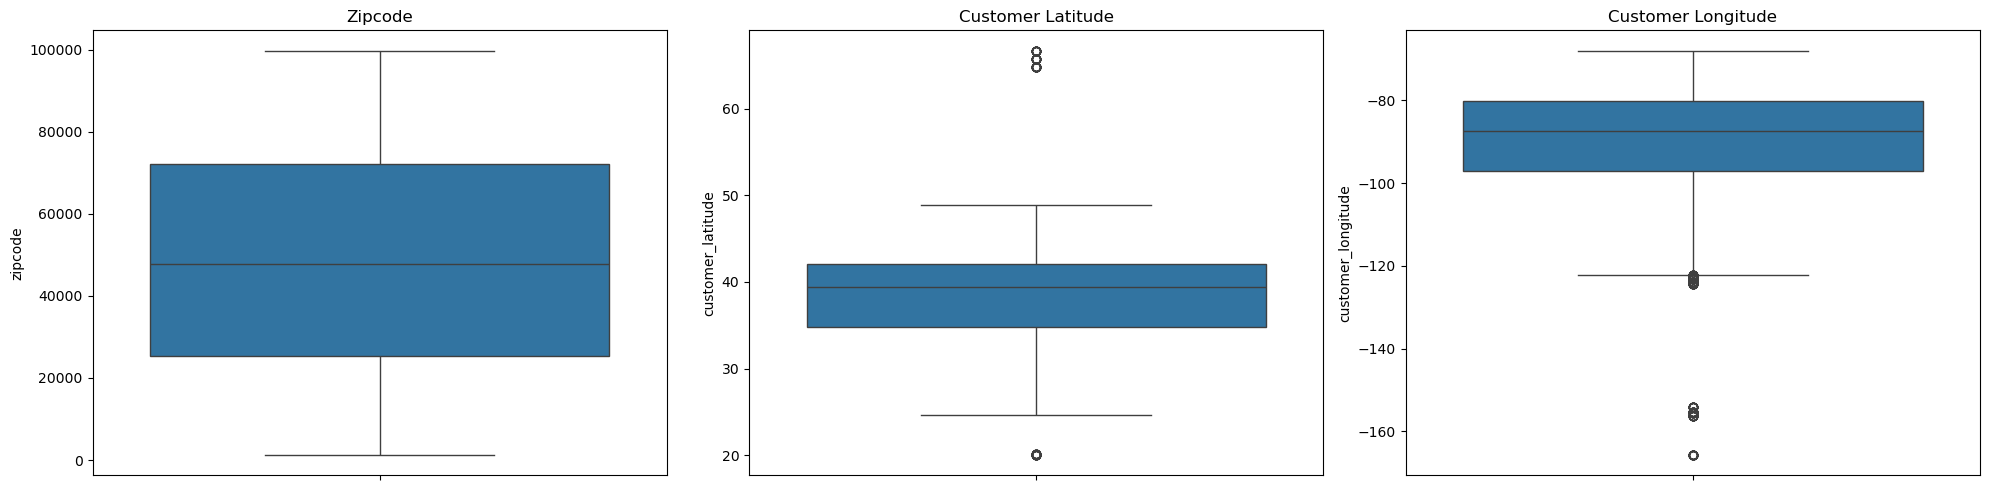

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.boxplot(df["zipcode"], ax=axes[0]).set(title="Zipcode")
sns.boxplot(df["customer_latitude"], ax=axes[1]).set(title="Customer Latitude")
sns.boxplot(df["customer_longitude"], ax=axes[2]).set(title="Customer Longitude")


plt.tight_layout()
plt.show()


In [32]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['customer_latitude'].quantile(0.25)
Q3 = df['customer_latitude'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
# Determine the upper bound
upper_bound = Q3 + 1.5 * IQR
lower_bound=Q1-1.5*IQR
# Cap values only above the upper bound
df['customer_latitude'] = df['customer_latitude'].clip(upper=upper_bound,lower=lower_bound)

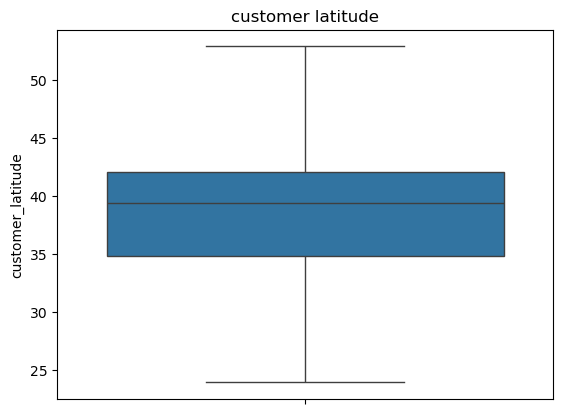

In [33]:
sns.boxplot(df["customer_latitude"])
plt.title("customer latitude")
plt.show()

In [34]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['customer_longitude'].quantile(0.25)
Q3 = df['customer_longitude'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
# Determine the upper bound
upper_bound = Q3 + 1.5 * IQR
lower_bound=Q1-1.5*IQR
# Cap values only above the upper bound
df['customer_longitude'] = df['customer_longitude'].clip(upper=upper_bound,lower=lower_bound)

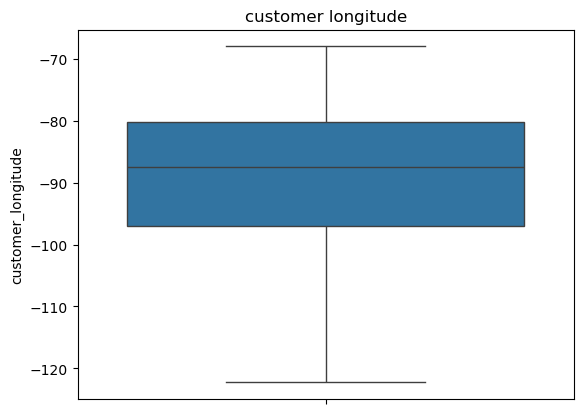

In [35]:
sns.boxplot(df["customer_longitude"])
plt.title("customer longitude")
plt.show()

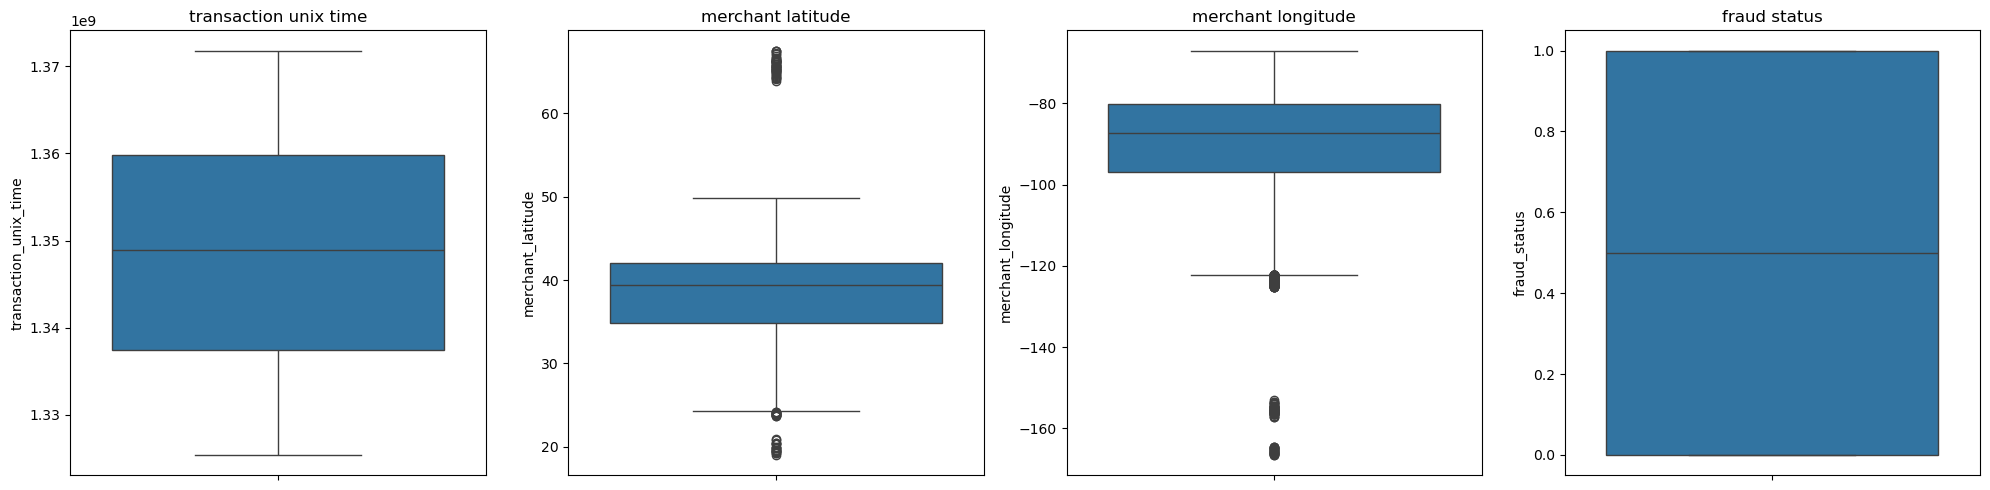

In [36]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.boxplot(df["transaction_unix_time"], ax=axes[0]).set(title="transaction unix time")
sns.boxplot(df["merchant_latitude"], ax=axes[1]).set(title="merchant latitude")
sns.boxplot(df["merchant_longitude"], ax=axes[2]).set(title="merchant longitude")
sns.boxplot(df["fraud_status"], ax=axes[3]).set(title="fraud status")

plt.tight_layout()
plt.show()

In [37]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['merchant_latitude'].quantile(0.25)
Q3 = df['merchant_latitude'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
# Determine the upper bound
upper_bound = Q3 + 1.5 * IQR
lower_bound=Q1-1.5*IQR
# Cap values only above the upper bound
df['merchant_latitude'] = df['merchant_latitude'].clip(upper=upper_bound,lower=lower_bound)

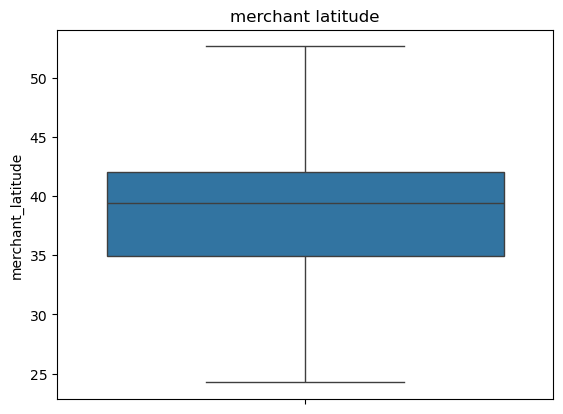

In [38]:
sns.boxplot(df["merchant_latitude"])
plt.title("merchant latitude")
plt.show()

In [39]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['merchant_longitude'].quantile(0.25)
Q3 = df['merchant_longitude'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
# Determine the upper bound
upper_bound = Q3 + 1.5 * IQR
lower_bound=Q1-1.5*IQR
# Cap values only above the upper bound
df['merchant_longitude'] = df['merchant_longitude'].clip(upper=upper_bound,lower=lower_bound)

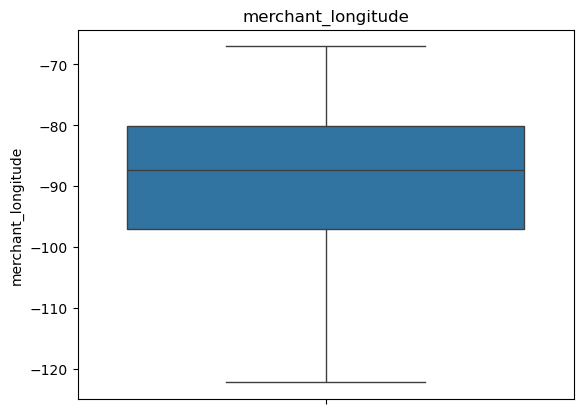

In [40]:
sns.boxplot(df["merchant_longitude"])
plt.title("merchant_longitude")
plt.show()

# Univariant

# Merchant Category Distribution

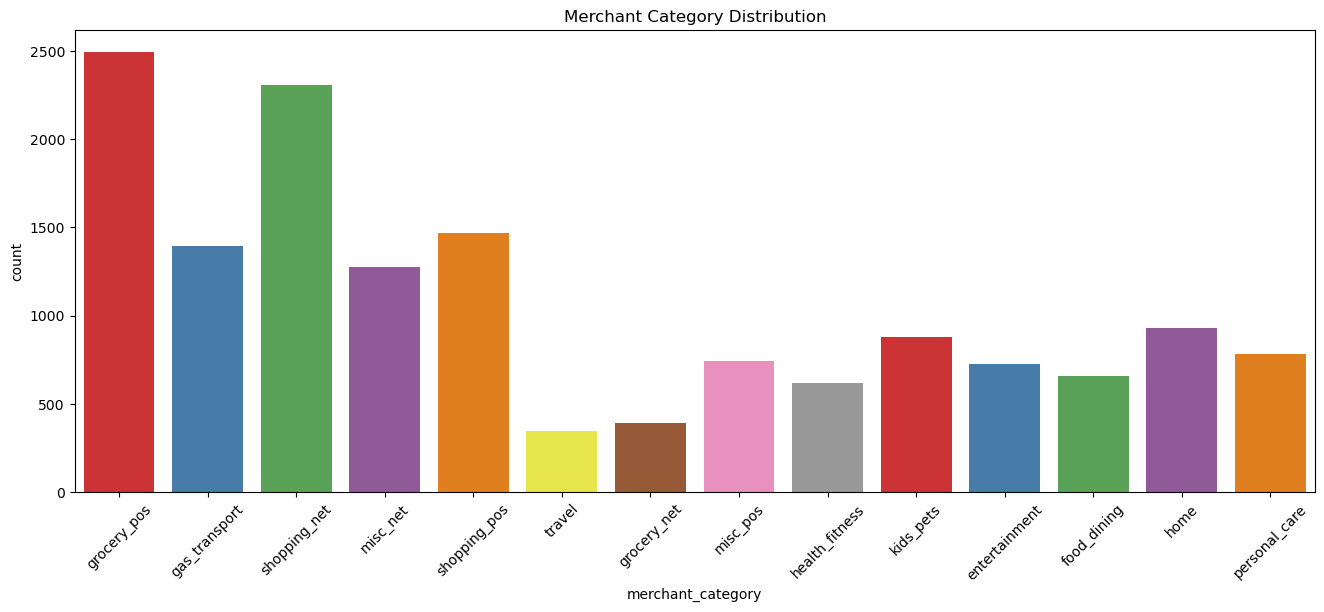

In [41]:
plt.figure(figsize=(16,6))
sns.countplot(x='merchant_category', data=df,palette="Set1")
plt.title("Merchant Category Distribution")
plt.xticks(rotation=45)
plt.show()


# Top 10 Customer Jobs

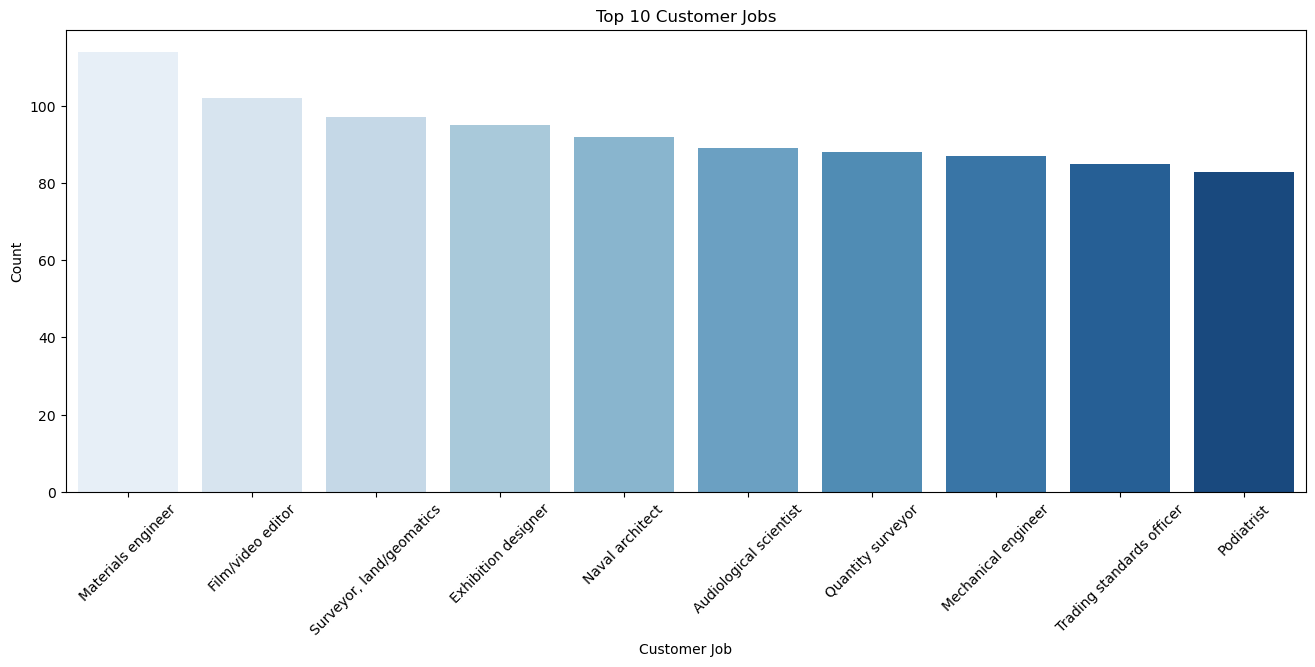

In [42]:
plt.figure(figsize=(16,6))
top_jobs = df['customer_job'].value_counts().nlargest(10) 
sns.barplot(x=top_jobs.index, y=top_jobs.values,palette="Blues")
plt.title("Top 10 Customer Jobs")
plt.xticks(rotation=45)
plt.xlabel("Customer Job")
plt.ylabel("Count")
plt.show()


# Customer state Distribution

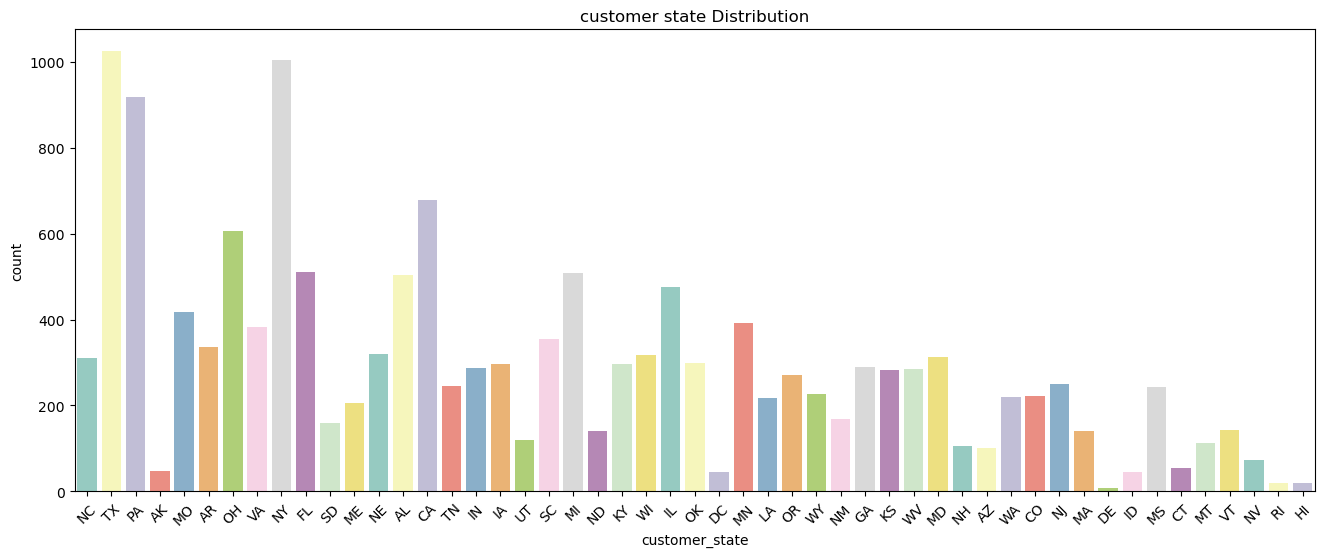

In [43]:
plt.figure(figsize=(16,6))
sns.countplot(x='customer_state', data=df,palette="Set3")
plt.title("customer state Distribution")
plt.xticks(rotation=45)
plt.show()


# Distribution of Transaction Amount

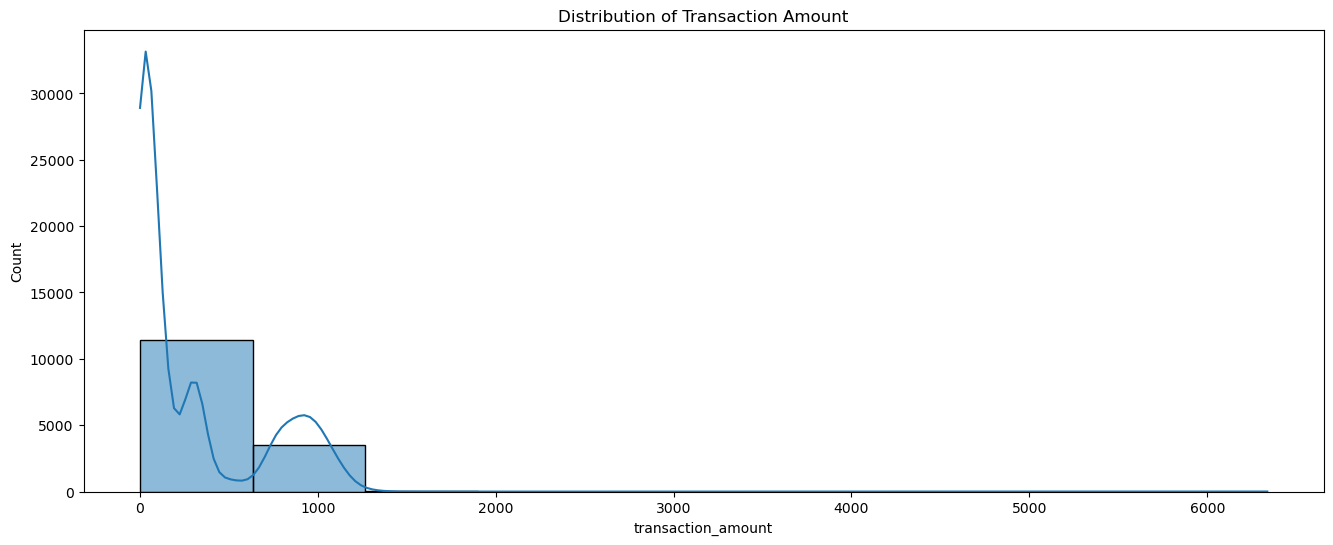

In [44]:
plt.figure(figsize=(16,6))
sns.histplot(df['transaction_amount'], kde=True, bins=10)
plt.title("Distribution of Transaction Amount")
plt.show()


# 


Gender Distribution

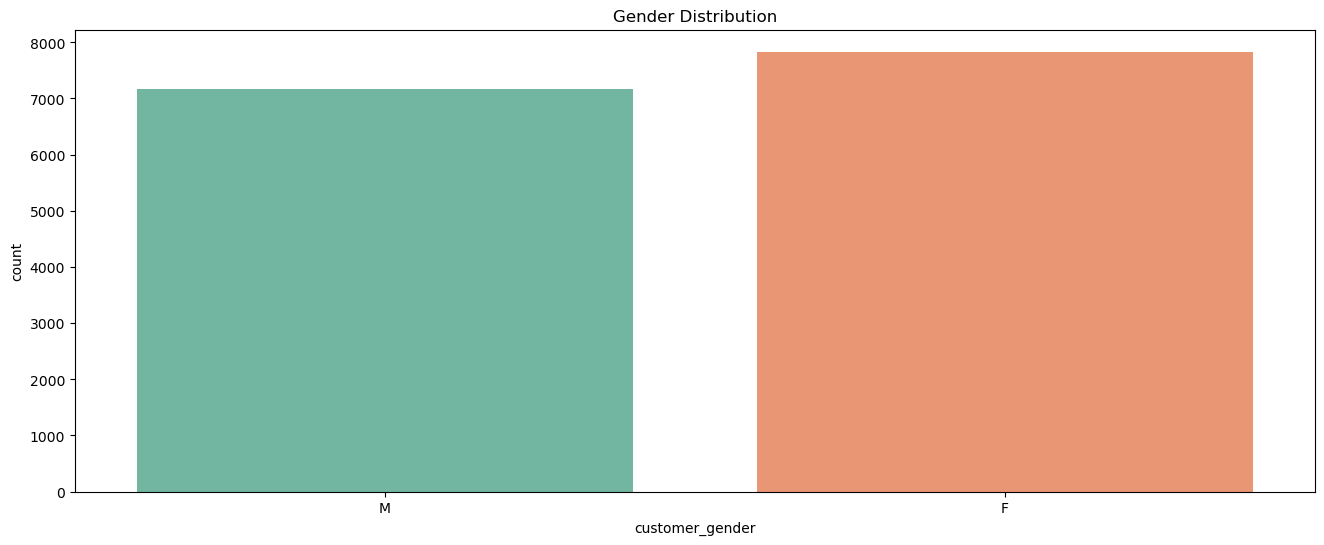

In [45]:
plt.figure(figsize=(16,6))
sns.countplot(x='customer_gender', data=df,palette="Set2")
plt.title("Gender Distribution")
plt.show()

# Distribution of Fraud vs Non-Fraud Transactions

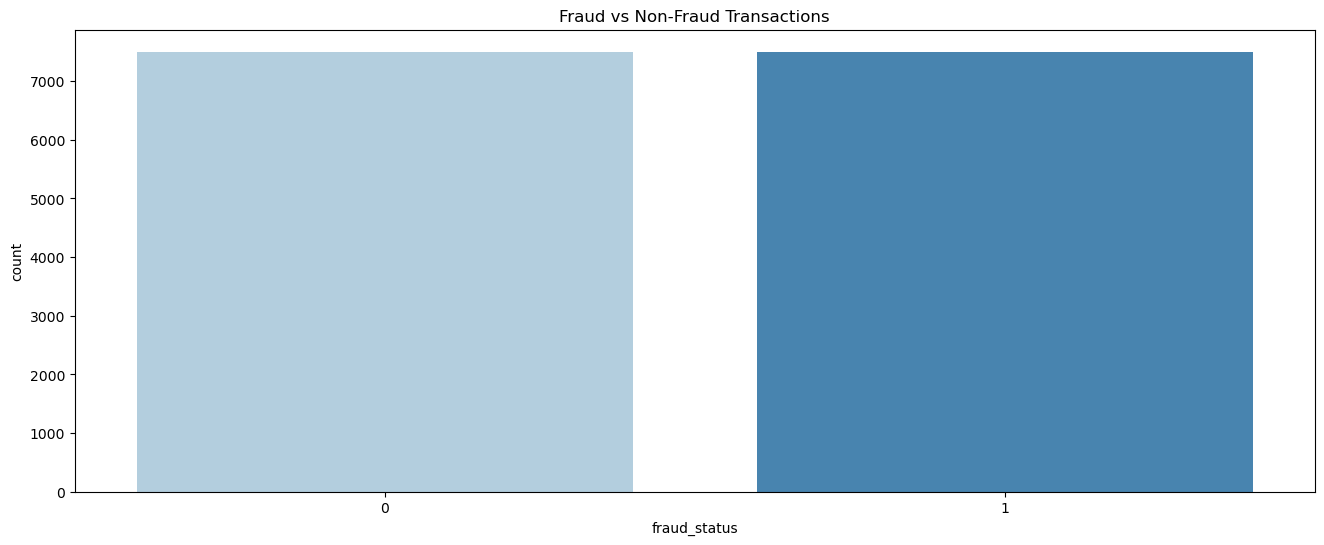

In [46]:
plt.figure(figsize=(16,6))
sns.countplot(x='fraud_status', data=df,palette="Blues")
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

# Transaction Hours Distribution

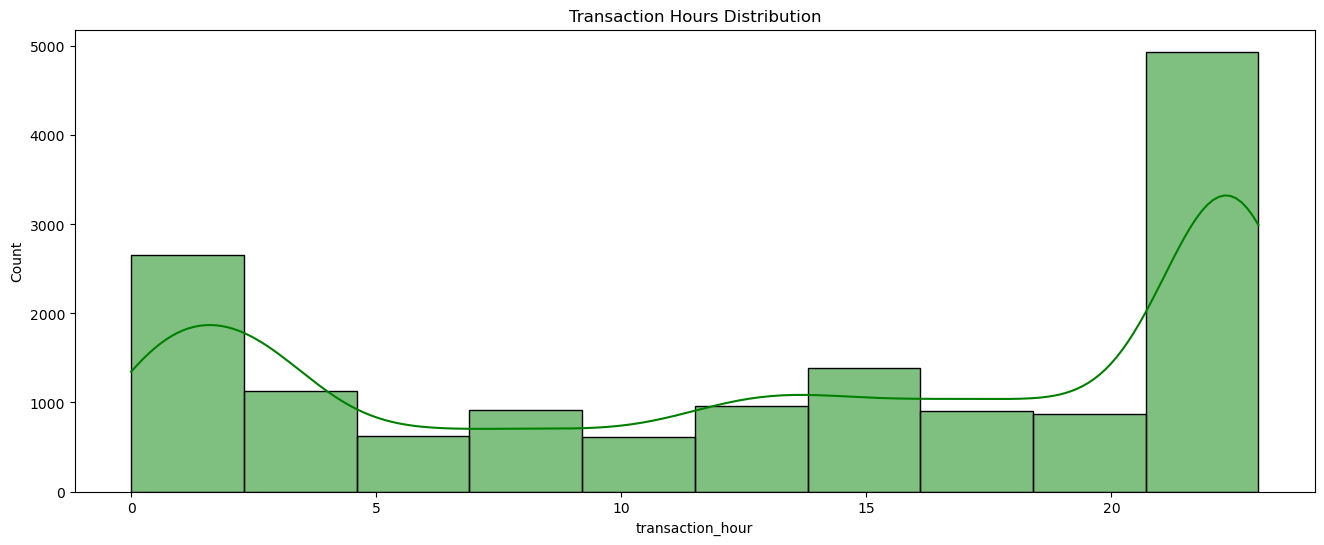

In [47]:
plt.figure(figsize=(16,6))
sns.histplot(df['transaction_hour'], kde=True, bins=10,color="g")
plt.title("Transaction Hours Distribution")
plt.show()

# Transaction year Distribution

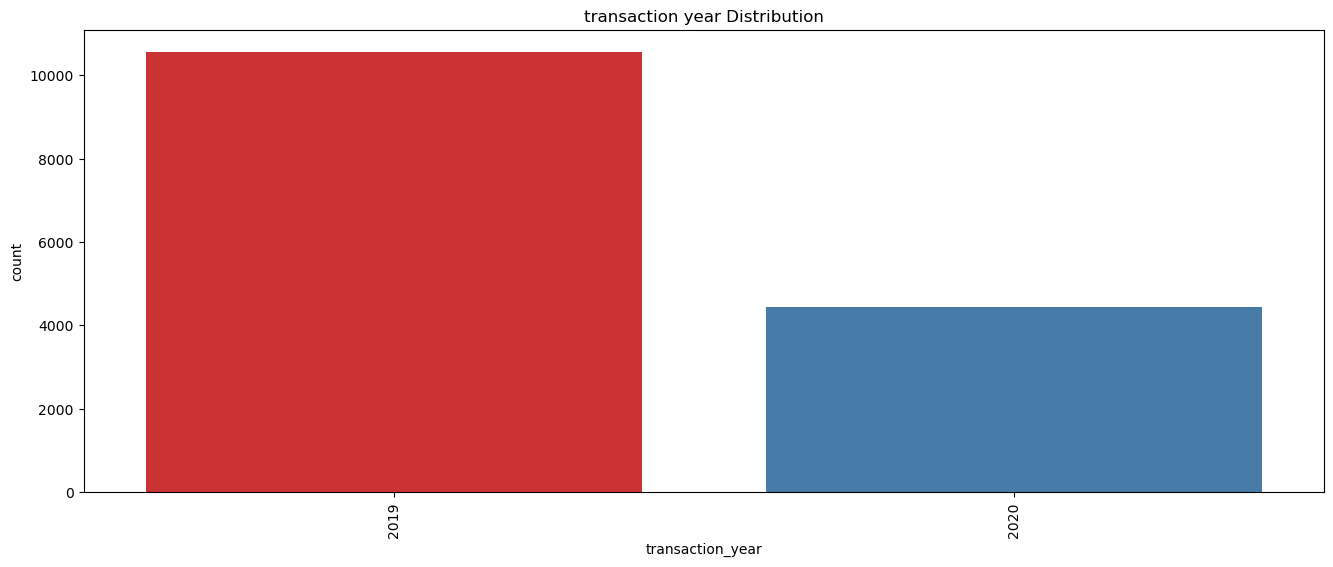

In [48]:
plt.figure(figsize=(16,6))
sns.countplot(x='transaction_year', data=df,palette="Set1")
plt.title("transaction year Distribution")
plt.xticks(rotation=90)
plt.show()

# Bivariant

In [49]:
df.head(2)

credit_card_number                     merchant_name merchant_category  \
2449       4613314721966            fraud_Rutherford-Mertz       grocery_pos   
2472     340187018810220  fraud_Jenkins, Hauck and Friesen     gas_transport   

      transaction_amount customer_gender  customer_city customer_state  \
2449              281.06               M  Collettsville             NC   
2472               11.52               F    San Antonio             TX   

      zipcode  customer_latitude  customer_longitude  city_population  \
2449    28611            35.9946            -81.7266              885   
2472    78208            29.4400            -98.4590          1595797   

                  customer_job                    transaction_id  \
2449            Soil scientist  e8a81877ae9a0a7f883e15cb39dc4022   
2472  Horticultural consultant  bc7d41c41103877b03232f03f1f8d3f5   

      transaction_unix_time  merchant_latitude  merchant_longitude  \
2449             1325466397          36.430124          -81.179483   
2472             1325468849          29.819364          -99.142791   

      fraud_status  transaction_year  transaction_month  transaction_date  \
2449             1              2019                  1                 2   
2472             1              2019                  1                 2   

      date_of_birth_year  date_of_birth_month  date_of_birth_day  \
2449                1988                    9                 15   
2472                1960                   10                 28   

      transaction_hour  transaction_minute  transaction_second  
2449                 1                   6                  37  
2472                 1                  47                  29

# Top 5 Merchants with Most Fraud Cases

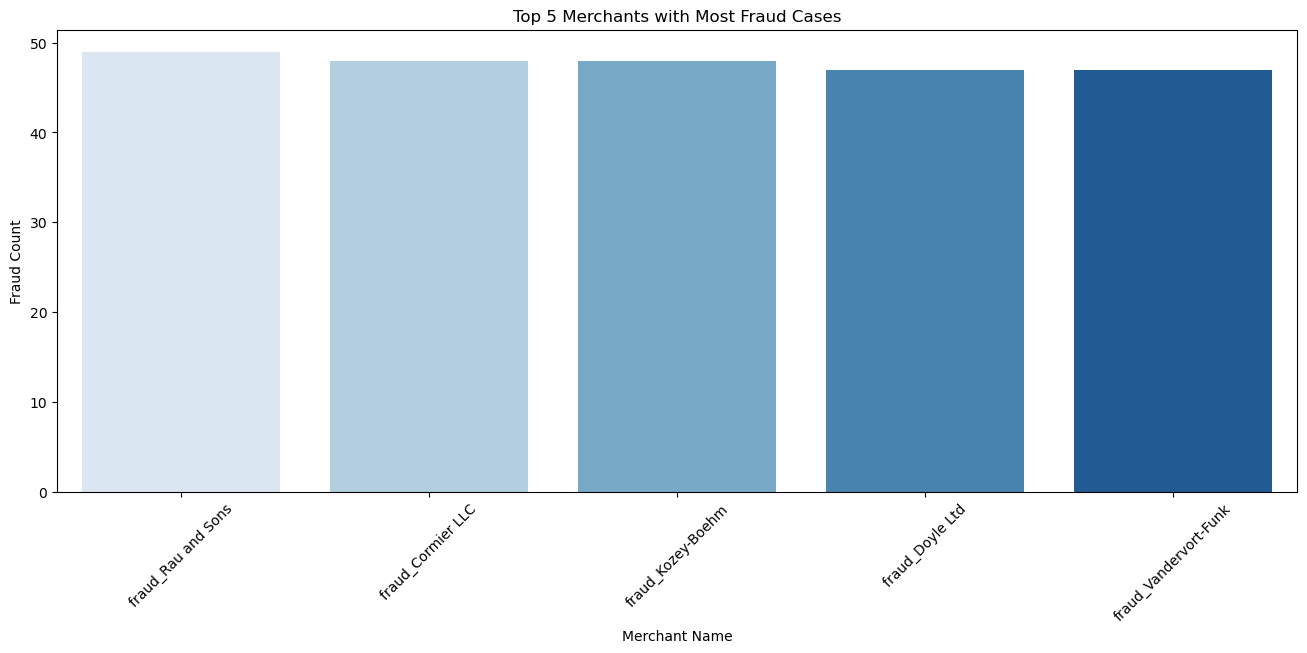

In [50]:
top_merchants = df[df["fraud_status"] == 1]["merchant_name"].value_counts().nlargest(5)

plt.figure(figsize=(16, 6))
sns.barplot(x=top_merchants.index, y=top_merchants.values,palette="Blues")
plt.title("Top 5 Merchants with Most Fraud Cases")
plt.xlabel("Merchant Name")
plt.ylabel("Fraud Count")
plt.xticks(rotation=45)
plt.show()


# Fraud vs Customer Gender

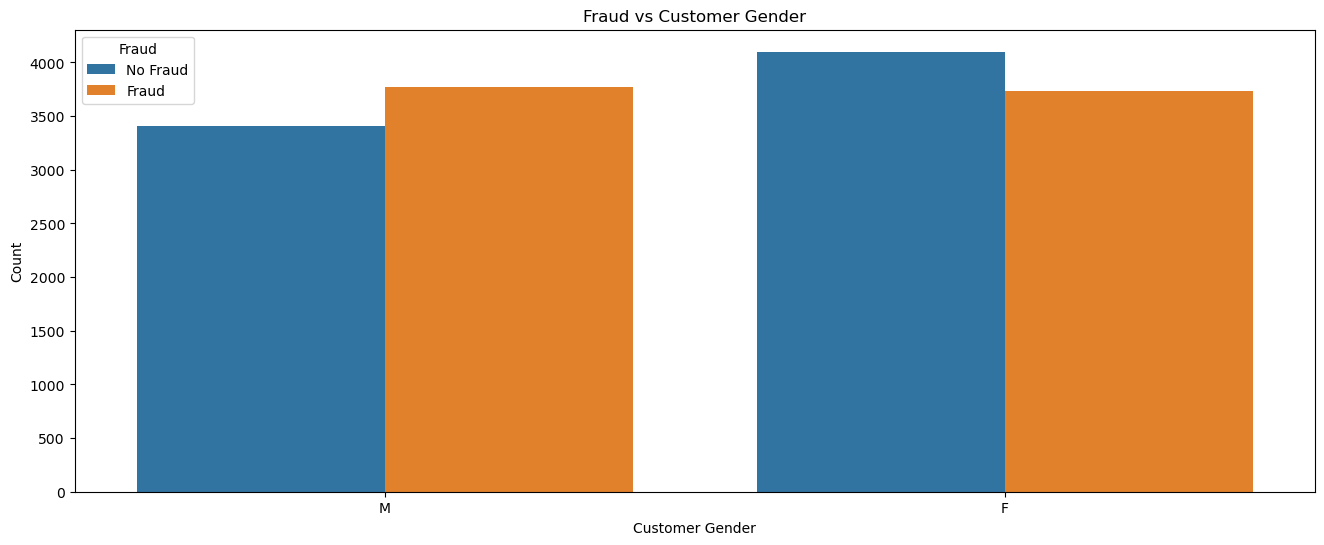

In [51]:
plt.figure(figsize=(16, 6))

# Create a count plot to visualize fraud vs customer gender
sns.countplot(data=df, x='customer_gender', hue='fraud_status')

# Add title and labels
plt.title('Fraud vs Customer Gender')
plt.xlabel('Customer Gender')
plt.ylabel('Count')

# Add legend with proper labels
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])

# Show the plot
plt.show()

# Top 10 Customer Jobs Associated with Fraud

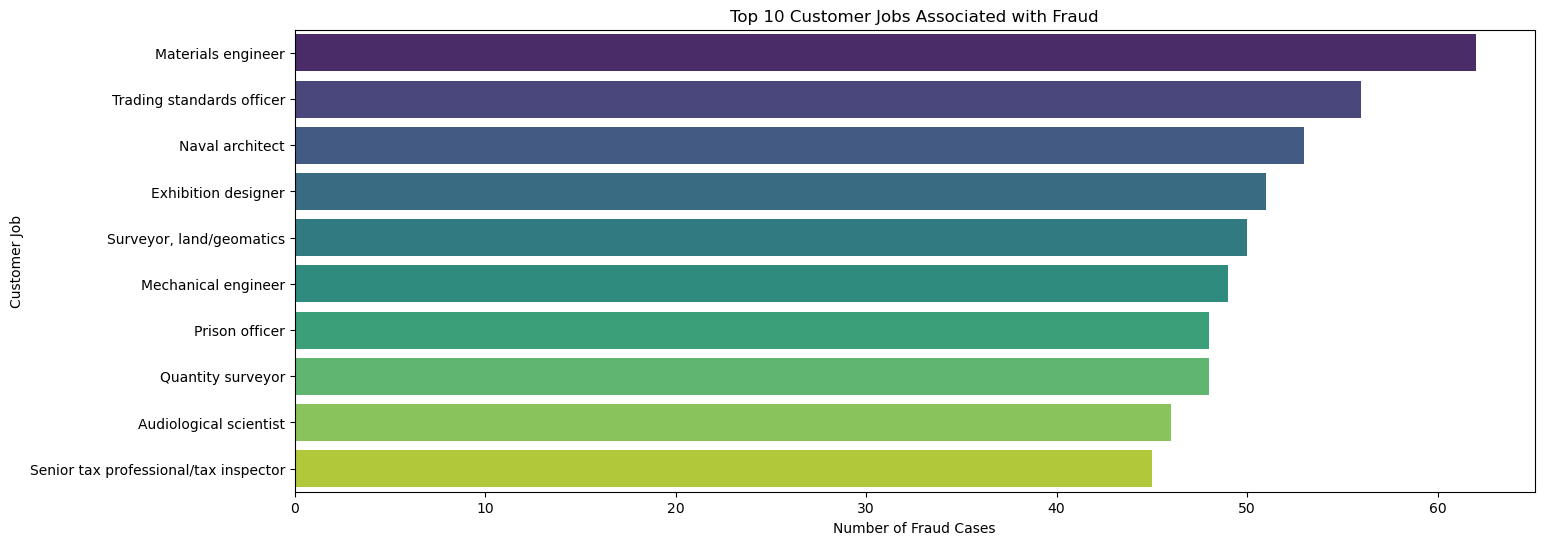

In [52]:
# Filter data for fraud cases (fraud_status = 1)
fraud_data = df[df['fraud_status'] == 1]

# Count the top 10 jobs associated with fraud
top_10_jobs = fraud_data['customer_job'].value_counts().head(10)

# Create a bar plot to visualize the top 10 jobs associated with fraud
plt.figure(figsize=(16, 6))
sns.barplot(x=top_10_jobs.values, y=top_10_jobs.index, palette='viridis')

# Add title and labels
plt.title('Top 10 Customer Jobs Associated with Fraud')
plt.xlabel('Number of Fraud Cases')
plt.ylabel('Customer Job')

# Show the plot
plt.show()

# Fraud vs customer state

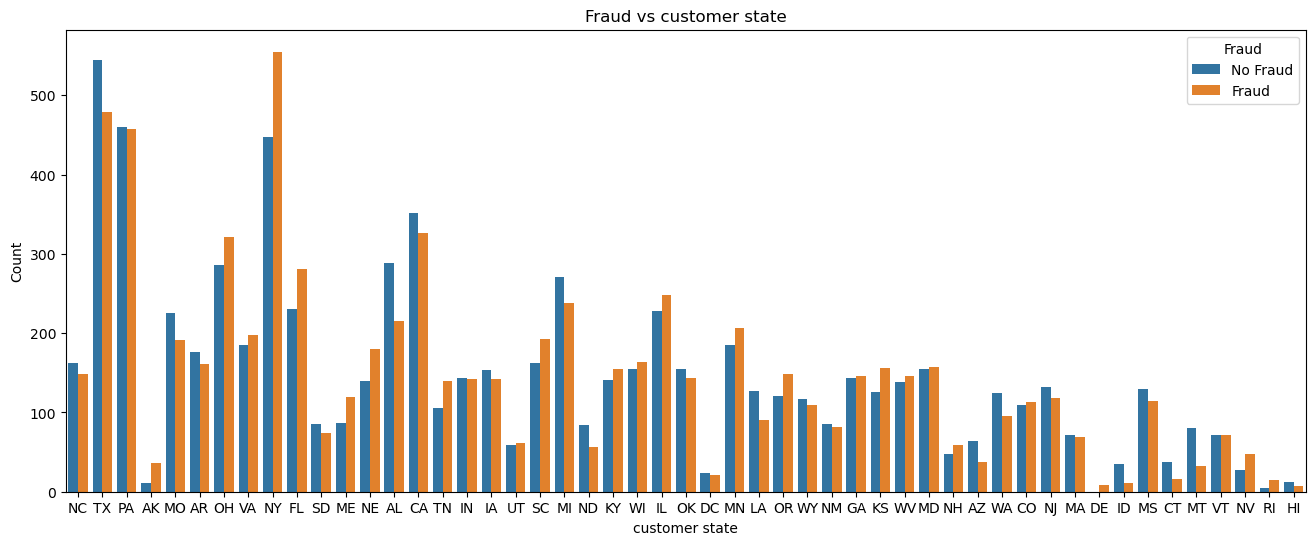

In [53]:
plt.figure(figsize=(16, 6))


sns.countplot(data=df, x='customer_state', hue='fraud_status')

# Add title and labels
plt.title('Fraud vs customer state')
plt.xlabel('customer state')
plt.ylabel('Count')

# Add legend with proper labels
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])

# Show the plot
plt.show()

# Top 10 Cities with Highest Fraud Cases

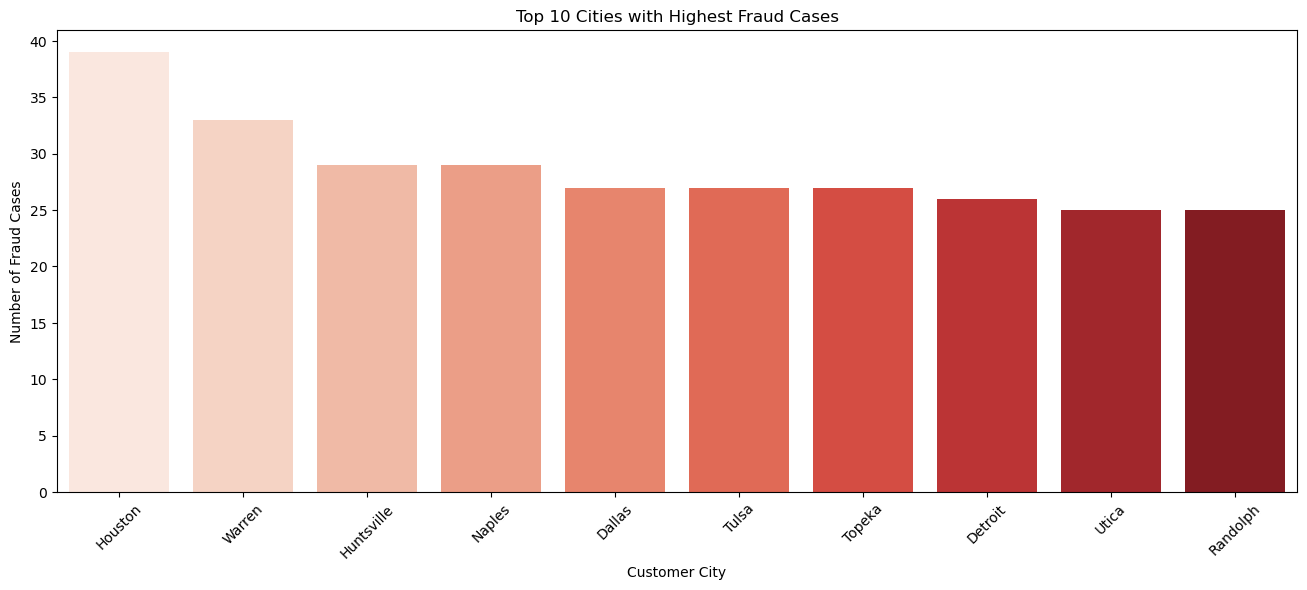

In [54]:

# Assuming df is your DataFrame
# Filter only fraud cases (assuming 'fraud_status' column has 1 for fraud and 0 for no fraud)
fraud_df = df[df['fraud_status'] == 1]

# Count fraud cases per city
top_cities = fraud_df['customer_city'].value_counts().head(10)

# Get top 10 customers with highest fraud transaction amounts
top_customers = fraud_df.nlargest(10, 'transaction_amount')[['customer_city', 'transaction_amount']]

# Plot the top 10 cities with the highest fraud cases
plt.figure(figsize=(16, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='Reds')

# Add title and labels
plt.title('Top 10 Cities with Highest Fraud Cases')
plt.xlabel('Customer City')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Multivariant

In [55]:
df.head(3)

credit_card_number                     merchant_name merchant_category  \
2449       4613314721966            fraud_Rutherford-Mertz       grocery_pos   
2472     340187018810220  fraud_Jenkins, Hauck and Friesen     gas_transport   
2523     340187018810220            fraud_Goodwin-Nitzsche       grocery_pos   

      transaction_amount customer_gender  customer_city customer_state  \
2449              281.06               M  Collettsville             NC   
2472               11.52               F    San Antonio             TX   
2523              276.31               F    San Antonio             TX   

      zipcode  customer_latitude  customer_longitude  city_population  \
2449    28611            35.9946            -81.7266              885   
2472    78208            29.4400            -98.4590          1595797   
2523    78208            29.4400            -98.4590          1595797   

                  customer_job                    transaction_id  \
2449            Soil scientist  e8a81877ae9a0a7f883e15cb39dc4022   
2472  Horticultural consultant  bc7d41c41103877b03232f03f1f8d3f5   
2523  Horticultural consultant  b98f12f4168391b2203238813df5aa8c   

      transaction_unix_time  merchant_latitude  merchant_longitude  \
2449             1325466397          36.430124          -81.179483   
2472             1325468849          29.819364          -99.142791   
2523             1325473523          29.273085          -98.836360   

      fraud_status  transaction_year  transaction_month  transaction_date  \
2449             1              2019                  1                 2   
2472             1              2019                  1                 2   
2523             1              2019                  1                 2   

      date_of_birth_year  date_of_birth_month  date_of_birth_day  \
2449                1988                    9                 15   
2472                1960                   10                 28   
2523                1960                   10                 28   

      transaction_hour  transaction_minute  transaction_second  
2449                 1                   6                  37  
2472                 1                  47                  29  
2523                 3                   5                  23

# Fraud Cases by City, Gender, and Transaction Amount

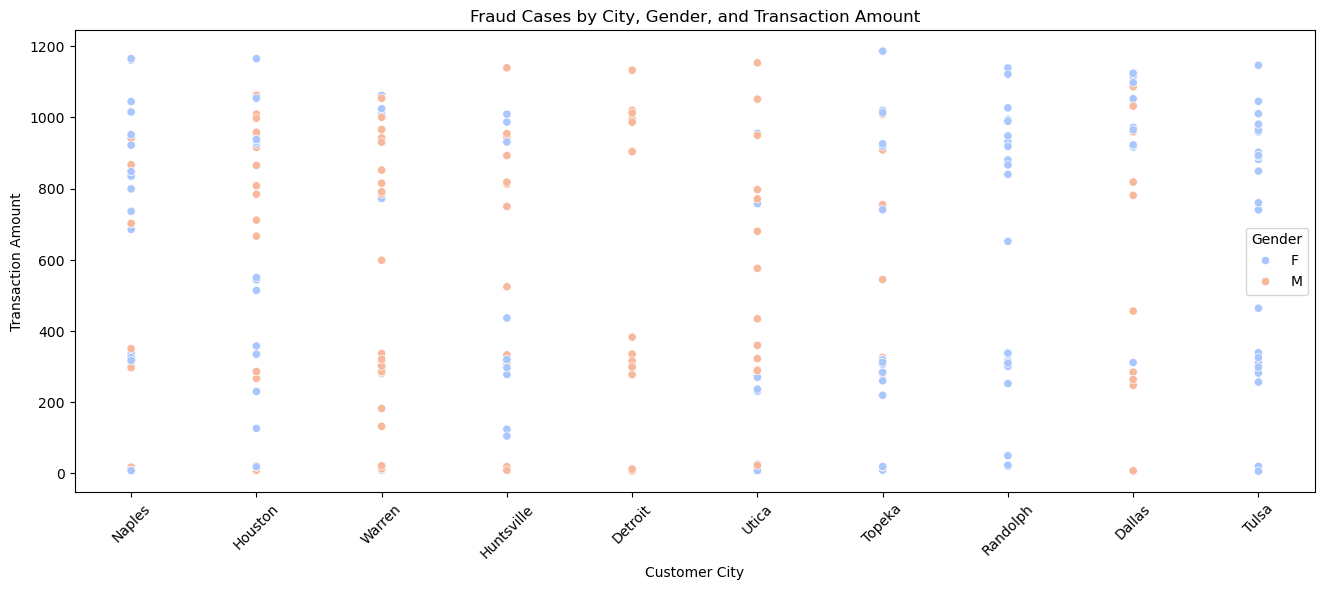

Top 10 Customers with Highest Fraud Transaction Amounts:
         customer_city customer_state  transaction_amount customer_gender
1262544     Queen Anne             MD             1376.04               F
514148           Tekoa             WA             1371.81               M
30239    Edisto Island             SC             1334.07               F
1258483     Queen Anne             MD             1324.80               F
821435      Karns City             PA             1313.18               F
1258594     Queen Anne             MD             1312.98               F
872879    Oconto Falls             WI             1294.83               M
75418          Hovland             MN             1292.21               M
531246          Dayton             OH             1289.89               F
878175      North East             PA             1289.07               F


In [56]:

# Assuming df is your DataFrame
# Filter only fraud cases (assuming 'fraud_status' column has 1 for fraud and 0 for no fraud)
fraud_df = df[df['fraud_status'] == 1]

# Count fraud cases per city
top_cities = fraud_df['customer_city'].value_counts().head(10)

# Get top 10 customers with highest fraud transaction amounts
top_customers = fraud_df.nlargest(10, 'transaction_amount')[['customer_city', 'customer_state', 'transaction_amount', 'customer_gender']]

# Plot fraud cases by city, gender, and transaction amount
plt.figure(figsize=(16, 6))
sns.scatterplot(data=fraud_df[fraud_df['customer_city'].isin(top_cities.index)], 
                x='customer_city', 
                y='transaction_amount', 
                hue='customer_gender', 
        
                palette='coolwarm',
                sizes=(20, 200))

# Add title and labels
plt.title('Fraud Cases by City, Gender, and Transaction Amount')
plt.xlabel('Customer City')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Show the plot
plt.show()

# Display top 10 customers with highest fraud amounts
print("Top 10 Customers with Highest Fraud Transaction Amounts:")
print(top_customers)


# Top 10 Fraud Status Counts by Merchant Name and Category

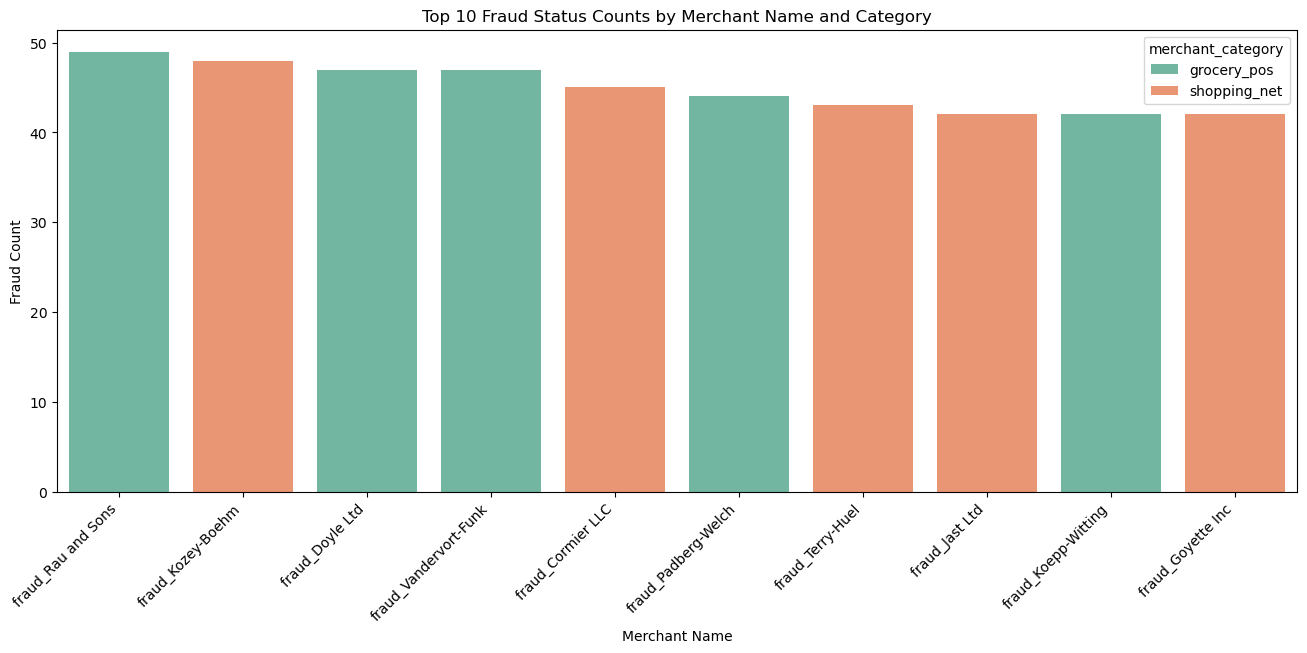

In [57]:
# Grouping by merchant name, category, and fraud status
fraud_counts = df.groupby(['merchant_name', 'merchant_category', 'fraud_status']).size().reset_index(name='count')

# Selecting top 10 merchants with highest fraud count
top_merchants = fraud_counts.sort_values(by='count', ascending=False).head(10)

# Create the plot
plt.figure(figsize=(16, 6))
sns.barplot(data=top_merchants, x='merchant_name', y='count', hue='merchant_category', palette="Set2")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.title('Top 10 Fraud Status Counts by Merchant Name and Category')
plt.xlabel('Merchant Name')
plt.ylabel('Fraud Count')

# Show the plot
plt.show()


# Top 10 Fraud Status Counts by Customer City and State

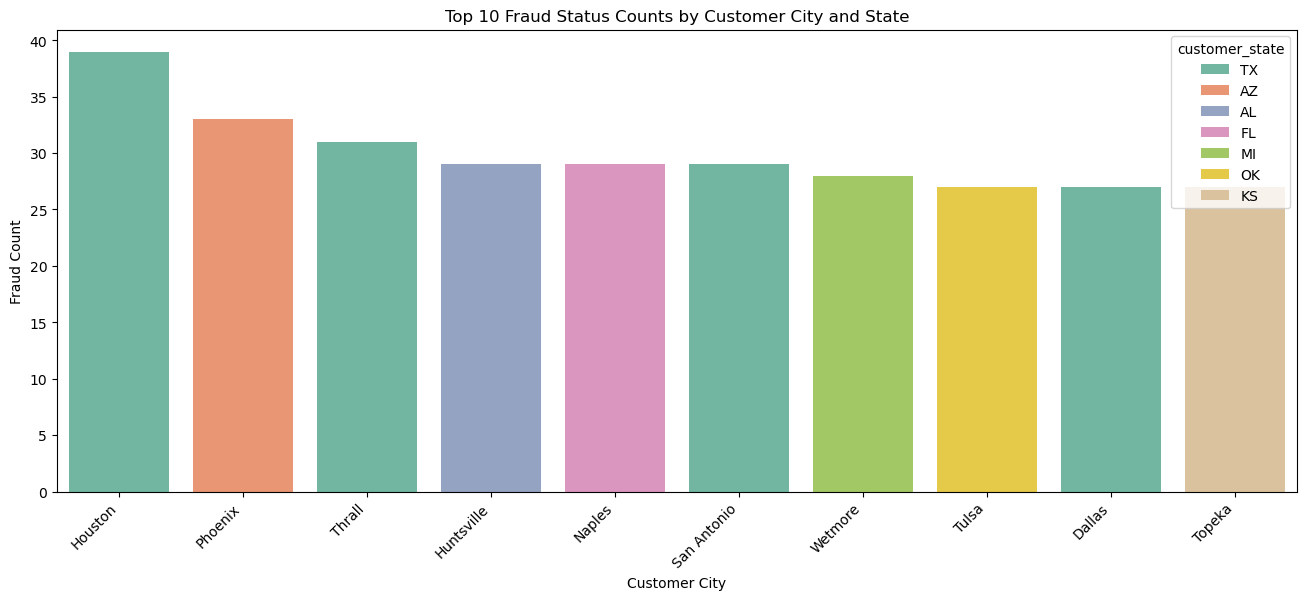

In [58]:
# Grouping by customer city, state, and fraud status
fraud_counts = df.groupby(['customer_city', 'customer_state', 'fraud_status']).size().reset_index(name='count')

# Selecting top 10 locations with highest fraud count
top_locations = fraud_counts.sort_values(by='count', ascending=False).head(10)

# Create the plot
plt.figure(figsize=(16, 6))
sns.barplot(data=top_locations, x='customer_city', y='count', hue='customer_state', palette="Set2")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.title('Top 10 Fraud Status Counts by Customer City and State')
plt.xlabel('Customer City')
plt.ylabel('Fraud Count')

# Show the plot
plt.show()


In [59]:
df.head(2)

credit_card_number                     merchant_name merchant_category  \
2449       4613314721966            fraud_Rutherford-Mertz       grocery_pos   
2472     340187018810220  fraud_Jenkins, Hauck and Friesen     gas_transport   

      transaction_amount customer_gender  customer_city customer_state  \
2449              281.06               M  Collettsville             NC   
2472               11.52               F    San Antonio             TX   

      zipcode  customer_latitude  customer_longitude  city_population  \
2449    28611            35.9946            -81.7266              885   
2472    78208            29.4400            -98.4590          1595797   

                  customer_job                    transaction_id  \
2449            Soil scientist  e8a81877ae9a0a7f883e15cb39dc4022   
2472  Horticultural consultant  bc7d41c41103877b03232f03f1f8d3f5   

      transaction_unix_time  merchant_latitude  merchant_longitude  \
2449             1325466397          36.430124          -81.179483   
2472             1325468849          29.819364          -99.142791   

      fraud_status  transaction_year  transaction_month  transaction_date  \
2449             1              2019                  1                 2   
2472             1              2019                  1                 2   

      date_of_birth_year  date_of_birth_month  date_of_birth_day  \
2449                1988                    9                 15   
2472                1960                   10                 28   

      transaction_hour  transaction_minute  transaction_second  
2449                 1                   6                  37  
2472                 1                  47                  29

# Fraud Status Distribution by Customer State and Gender

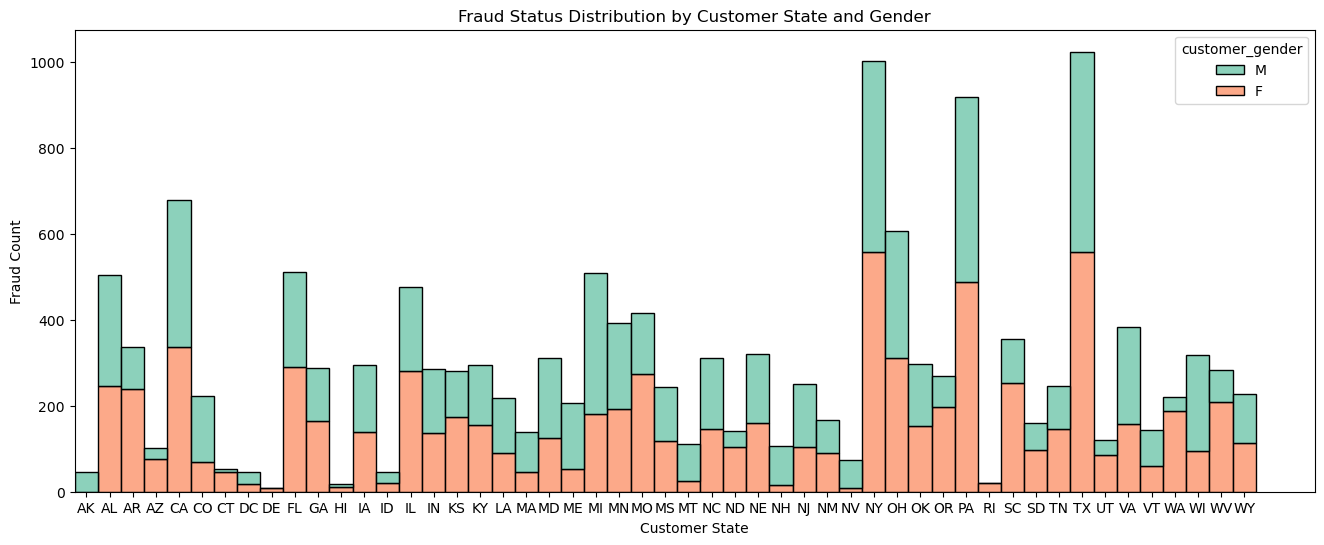

In [60]:
# Grouping by customer state, gender, and fraud status
fraud_counts = df.groupby(['customer_state', 'customer_gender', 'fraud_status']).size().reset_index(name='count')

# Create a different type of plot (e.g., stacked bar chart)
plt.figure(figsize=(16, 6))
sns.histplot(data=fraud_counts, x='customer_state', weights='count', hue='customer_gender',  multiple='stack', palette="Set2")

# Adjust x-axis limits to start slightly away from zero and extend to the last bin
plt.xlim(left=-0.5)

# Set labels and title
plt.title('Fraud Status Distribution by Customer State and Gender')
plt.xlabel('Customer State')
plt.ylabel('Fraud Count')

# Show the plot
plt.show()


# Fraud Status Distribution by Top 10 Customer Cities and Gender

Text(0, 0.5, 'Fraud Count')

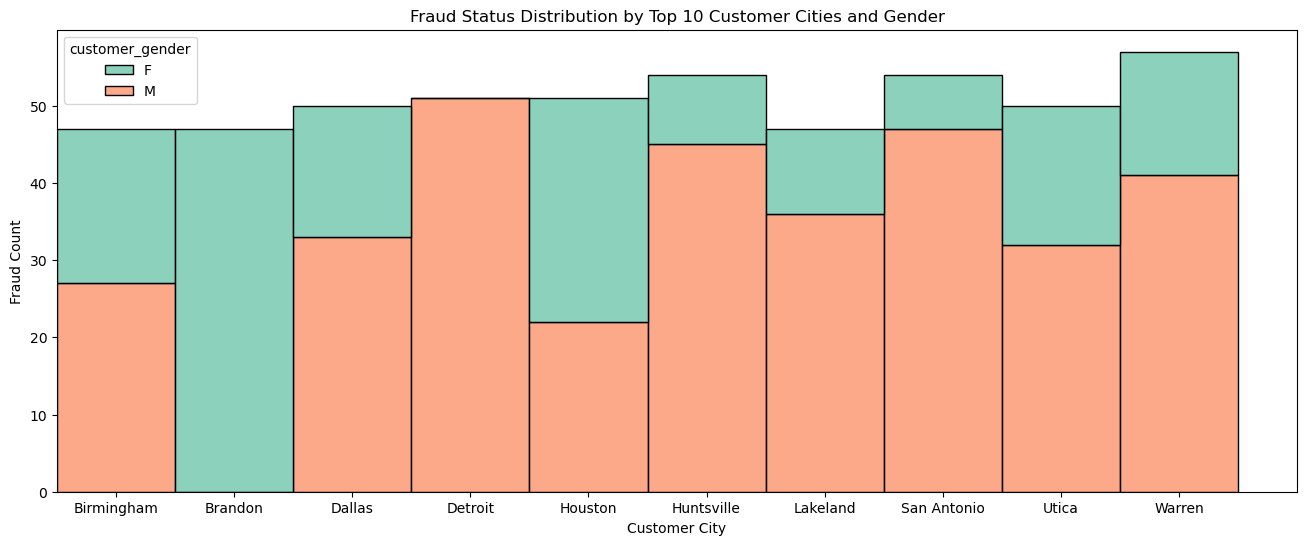

In [61]:
# Grouping by customer city, gender, and fraud status
fraud_counts = df.groupby(['customer_city', 'customer_gender', 'fraud_status']).size().reset_index(name='count')

# Calculate the total fraud count for each city
city_fraud_total = fraud_counts.groupby('customer_city')['count'].sum().reset_index()

# Sort and keep the top 10 cities based on total fraud count
top_cities = city_fraud_total.sort_values(by='count', ascending=False).head(10)['customer_city']

# Filter fraud_counts to only include the top 10 cities
fraud_counts_top_cities = fraud_counts[fraud_counts['customer_city'].isin(top_cities)]

# Create a stacked bar chart
plt.figure(figsize=(16, 6))
sns.histplot(data=fraud_counts_top_cities, x='customer_city', weights='count', hue='customer_gender', multiple='stack', palette="Set2")

# Adjust x-axis limits to start slightly away from zero and extend to the last bin
plt.xlim(left=-0.5)

# Set labels and title
plt.title('Fraud Status Distribution by Top 10 Customer Cities and Gender')
plt.xlabel('Customer City')
plt.ylabel('Fraud Count')


#  Fraud Trend during transaction

In [62]:
# Group by transaction year and fraud status
fraud_by_year = df.groupby(['transaction_year', 'fraud_status']).size().reset_index(name='count')

# Plot the trend
fig = px.line(fraud_by_year, 
              x='transaction_year', 
              y='count', 
              color='fraud_status', 
              title='Fraud Trend by Transaction Year',
              labels={'transaction_year': 'Transaction Year', 'count': 'Fraud Count'})

fig.show()
 # Group by transaction month and fraud status
fraud_by_month = df.groupby(['transaction_month', 'fraud_status']).size().reset_index(name='count')

# Plot the trend
fig = px.line(fraud_by_month, 
              x='transaction_month', 
              y='count', 
              color='fraud_status', 
              title='Fraud Trend by Transaction Month',
              labels={'transaction_month': 'Transaction Month', 'count': 'Fraud Count'})

fig.show()
# Group by transaction date (day) and fraud status
fraud_by_date = df.groupby(['transaction_date', 'fraud_status']).size().reset_index(name='count')

# Plot the trend
fig = px.line(fraud_by_date, 
              x='transaction_date', 
              y='count', 
              color='fraud_status', 
              title='Fraud Trend by Transaction Date',
              labels={'transaction_date': 'Transaction Date', 'count': 'Fraud Count'})

fig.show()

# Group by transaction hour and fraud status
fraud_by_hour = df.groupby(['transaction_hour', 'fraud_status']).size().reset_index(name='count')

# Plot the trend
fig = px.line(fraud_by_hour, 
              x='transaction_hour', 
              y='count', 
              color='fraud_status', 
              title='Fraud Trend by Transaction Hour',
              labels={'transaction_hour': 'Transaction Hour', 'count': 'Fraud Count'})

fig.show()
# Group by transaction minute and fraud status
fraud_by_minute = df.groupby(['transaction_minute', 'fraud_status']).size().reset_index(name='count')

# Plot the trend
fig = px.line(fraud_by_minute, 
              x='transaction_minute', 
              y='count', 
              color='fraud_status', 
              title='Fraud Trend by Transaction Minute',
              labels={'transaction_minute': 'Transaction Minute', 'count': 'Fraud Count'})

fig.show()


In [63]:
# import plotly.express as px

# # Assuming your DataFrame is `df` and contains latitude, longitude, and fraud status

# # Plotting the map with fraud status
fig = px.scatter_geo(df, 
                     lat='customer_latitude',  # Latitude column
                     lon='customer_longitude', # Longitude column
                     color='fraud_status',     # Fraud status for coloring the points
                     hover_name='customer_city', # Display city on hover
                     hover_data=['customer_state', 'fraud_status', 'transaction_amount'],  # Display more details on hover
                     title='Customer Fraud Status Map',
                     projection='natural earth',  # Use natural earth projection
                     color_continuous_scale='Viridis'  # Choose color scale
)

# Change background color
fig.update_layout(
    paper_bgcolor='lightblue',  # Background color of the entire figure (behind the map)
    plot_bgcolor='lightgray',   # Background color of the plot area (map itself)
)

# Show the map
fig.show()


In [64]:
df.head()

credit_card_number                     merchant_name merchant_category  \
2449       4613314721966            fraud_Rutherford-Mertz       grocery_pos   
2472     340187018810220  fraud_Jenkins, Hauck and Friesen     gas_transport   
2523     340187018810220            fraud_Goodwin-Nitzsche       grocery_pos   
2546       4613314721966            fraud_Erdman-Kertzmann     gas_transport   
2553     340187018810220                fraud_Koepp-Parker       grocery_pos   

      transaction_amount customer_gender  customer_city customer_state  \
2449              281.06               M  Collettsville             NC   
2472               11.52               F    San Antonio             TX   
2523              276.31               F    San Antonio             TX   
2546                7.03               M  Collettsville             NC   
2553              275.73               F    San Antonio             TX   

      zipcode  customer_latitude  customer_longitude  city_population  \
2449    28611            35.9946            -81.7266              885   
2472    78208            29.4400            -98.4590          1595797   
2523    78208            29.4400            -98.4590          1595797   
2546    28611            35.9946            -81.7266              885   
2553    78208            29.4400            -98.4590          1595797   

                  customer_job                    transaction_id  \
2449            Soil scientist  e8a81877ae9a0a7f883e15cb39dc4022   
2472  Horticultural consultant  bc7d41c41103877b03232f03f1f8d3f5   
2523  Horticultural consultant  b98f12f4168391b2203238813df5aa8c   
2546            Soil scientist  397894a5c4c02e3c61c784001f0f14e4   
2553  Horticultural consultant  7863235a750d73a244c07f1fb7f0185a   

      transaction_unix_time  merchant_latitude  merchant_longitude  \
2449             1325466397          36.430124          -81.179483   
2472             1325468849          29.819364          -99.142791   
2523             1325473523          29.273085          -98.836360   
2546             1325475483          35.909292          -82.091010   
2553             1325476547          29.786426          -98.683410   

      fraud_status  transaction_year  transaction_month  transaction_date  \
2449             1              2019                  1                 2   
2472             1              2019                  1                 2   
2523             1              2019                  1                 2   
2546             1              2019                  1                 2   
2553             1              2019                  1                 2   

      date_of_birth_year  date_of_birth_month  date_of_birth_day  \
2449                1988                    9                 15   
2472                1960                   10                 28   
2523                1960                   10                 28   
2546                1988                    9                 15   
2553                1960                   10                 28   

      transaction_hour  transaction_minute  transaction_second  
2449                 1                   6                  37  
2472                 1                  47                  29  
2523                 3                   5                  23  
2546                 3                  38                   3  
2553                 3                  55                  47

# Feature Engineering

In [65]:
df["customer_state"].unique()

array(['NC', 'TX', 'PA', 'AK', 'MO', 'AR', 'OH', 'VA', 'NY', 'FL', 'SD',
       'ME', 'NE', 'AL', 'CA', 'TN', 'IN', 'IA', 'UT', 'SC', 'MI', 'ND',
       'KY', 'WI', 'IL', 'OK', 'DC', 'MN', 'LA', 'OR', 'WY', 'NM', 'GA',
       'KS', 'WV', 'MD', 'NH', 'AZ', 'WA', 'CO', 'NJ', 'MA', 'DE', 'ID',
       'MS', 'CT', 'MT', 'VT', 'NV', 'RI', 'HI'], dtype=object)

In [66]:
from sklearn.preprocessing import LabelEncoder
label_encoder_merchant_category=LabelEncoder()
df['merchant_category']=label_encoder_merchant_category.fit_transform(df['merchant_category'])

In [67]:
from sklearn.preprocessing import LabelEncoder
label_encoder_customer_state=LabelEncoder()
df['customer_state']=label_encoder_customer_state.fit_transform(df['customer_state'])

In [68]:
from sklearn.preprocessing import LabelEncoder
label_encoder_customer_gender=LabelEncoder()
df['customer_gender']=label_encoder_customer_gender.fit_transform(df['customer_gender'])

In [69]:
from sklearn.preprocessing import LabelEncoder
label_encoder_customer_job=LabelEncoder()
df['customer_job']=label_encoder_customer_job.fit_transform(df['customer_job'])

In [70]:
import pickle
with open('label_encoder_customer_state.pkl','wb') as file:
    pickle.dump(label_encoder_customer_state,file)
with open('label_encoder_merchant_category.pkl','wb') as file:
    pickle.dump(label_encoder_merchant_category,file)

with open('label_encoder_customer_gender.pkl','wb') as file:
    pickle.dump(label_encoder_customer_gender,file)

with open('label_encoder_customer_job.pkl','wb') as file:
    pickle.dump(label_encoder_customer_job,file)

In [71]:
df

credit_card_number                       merchant_name  \
2449          4613314721966              fraud_Rutherford-Mertz   
2472        340187018810220    fraud_Jenkins, Hauck and Friesen   
2523        340187018810220              fraud_Goodwin-Nitzsche   
2546          4613314721966              fraud_Erdman-Kertzmann   
2553        340187018810220                  fraud_Koepp-Parker   
...                     ...                                 ...   
477760     3535808924394848                 fraud_Rolfson-Kunde   
1215574      38797410705641                 fraud_Kihn-Schuster   
437865     6011999606625827                  fraud_Erdman-Ebert   
1047310    3527063666782582                     fraud_Boyer PLC   
566921        4586260469584  fraud_Windler, Goodwin and Kovacek   

         merchant_category  transaction_amount  customer_gender  \
2449                     4              281.06                1   
2472                     2               11.52                0   
2523                     4              276.31                0   
2546                     2                7.03                1   
2553                     4              275.73                0   
...                    ...                 ...              ...   
477760                  10               74.48                1   
1215574                  1               62.22                1   
437865                  10               49.65                1   
1047310                 11                3.62                0   
566921                   6               19.99                0   

           customer_city  customer_state  zipcode  customer_latitude  \
2449       Collettsville              27    28611            35.9946   
2472         San Antonio              43    78208            29.4400   
2523         San Antonio              43    78208            29.4400   
2546       Collettsville              27    28611            35.9946   
2553         San Antonio              43    78208            29.4400   
...                  ...             ...      ...                ...   
477760        Tower Hill              14    62571            39.3900   
1215574         Oak Hill              34    12460            42.4069   
437865   Harrington Park              31     7640            40.9918   
1047310           Camden              43    75934            30.9000   
566921        Mound City              24    64470            40.1362   

         customer_longitude  city_population  customer_job  \
2449               -81.7266              885           424   
2472               -98.4590          1595797           227   
2523               -98.4590          1595797           227   
2546               -81.7266              885           424   
2553               -98.4590          1595797           227   
...                     ...              ...           ...   
477760             -88.9597             1532           383   
1215574            -74.1528              277           215   
437865             -73.9800             4664           385   
1047310            -94.7547               99            91   
566921             -95.2138             1631            31   

                           transaction_id  transaction_unix_time  \
2449     e8a81877ae9a0a7f883e15cb39dc4022             1325466397   
2472     bc7d41c41103877b03232f03f1f8d3f5             1325468849   
2523     b98f12f4168391b2203238813df5aa8c             1325473523   
2546     397894a5c4c02e3c61c784001f0f14e4             1325475483   
2553     7863235a750d73a244c07f1fb7f0185a             1325476547   
...                                   ...                    ...   
477760   593bdc0a78787937f830255da11fc6ab             1343502475   
1215574  73db207aa6a2ca86000e48f8cb4c17a9             1369348318   
437865   f866515a22204cd3b47cb381ca2fc4f6             1342282369   
1047310  b528c569a413a1d67d9a027fb7447b52             1362895173   
566921   45a3c0457ace4bbc84876d5e6319d96a

In [72]:
df['age']=df['transaction_year']-df['date_of_birth_year']

In [73]:
df=df.drop(['credit_card_number','merchant_name','customer_city','date_of_birth_year','zipcode','zipcode','customer_longitude','date_of_birth_day','date_of_birth_month','transaction_second','customer_latitude','merchant_latitude','merchant_longitude','transaction_unix_time','transaction_id'],axis=1)

In [74]:
df.head(2)

merchant_category  transaction_amount  customer_gender  customer_state  \
2449                  4              281.06                1              27   
2472                  2               11.52                0              43   

      city_population  customer_job  fraud_status  transaction_year  \
2449              885           424             1              2019   
2472          1595797           227             1              2019   

      transaction_month  transaction_date  transaction_hour  \
2449                  1                 2                 1   
2472                  1                 2                 1   

      transaction_minute  age  
2449                   6   31  
2472                  47   59

In [75]:
corr=df.corr()

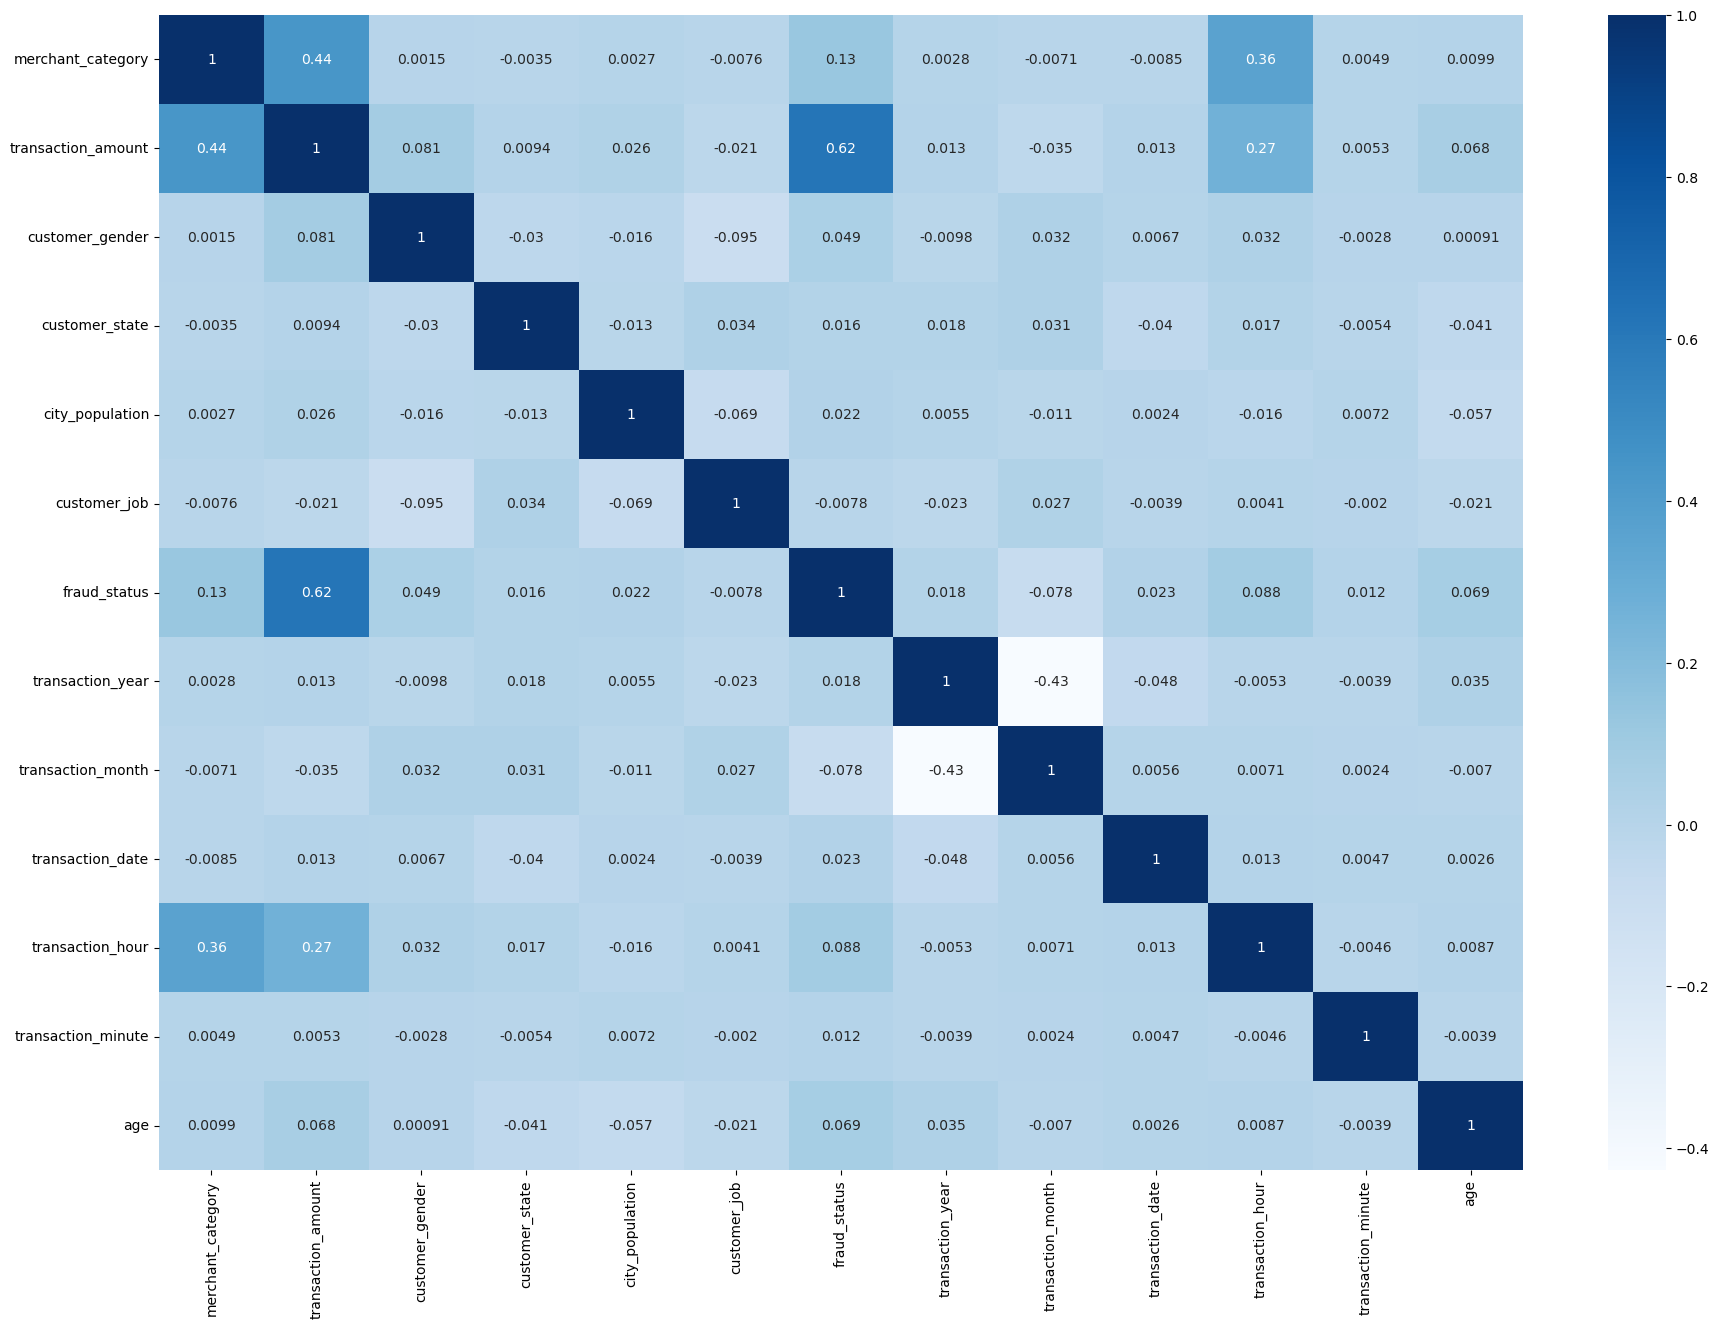

In [76]:
plt.figure(figsize=(22,15))
sns.heatmap(corr,annot=True,cmap="Blues")
plt.show()

In [77]:
df.head(2)

merchant_category  transaction_amount  customer_gender  customer_state  \
2449                  4              281.06                1              27   
2472                  2               11.52                0              43   

      city_population  customer_job  fraud_status  transaction_year  \
2449              885           424             1              2019   
2472          1595797           227             1              2019   

      transaction_month  transaction_date  transaction_hour  \
2449                  1                 2                 1   
2472                  1                 2                 1   

      transaction_minute  age  
2449                   6   31  
2472                  47   59

# Logistic Regression Classifier

In [78]:
X=df.drop(columns=["fraud_status"])
y=df[["fraud_status"]]

In [79]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

In [80]:
#feature Scaling
#column=> mean=>
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

In [81]:
with open('st_x.pkl','wb') as file:
    
    pickle.dump(st_x,file)

In [82]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [83]:
#Predicting the test set result
y_predict= classifier.predict(X_test)

In [84]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predict)
cm

array([[1807,  102],
       [ 447, 1397]])

In [85]:
from sklearn.metrics import accuracy_score

LR_accuracy = accuracy_score(y_test, y_predict)
print("Accuracy",LR_accuracy)

Accuracy 0.8537170263788969


# Support Vector Classifier

In [86]:
from sklearn.svm import SVC # "Support vector classifier"
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [87]:
#Predicting the test set result
y_predicts= classifier.predict(X_test)

In [88]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_predicts)
cm

array([[1826,   83],
       [ 453, 1391]])

In [89]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_predicts))


Accuracy: 0.8571809219291233


# Decision Tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [91]:

# Make predictions
y__pred = clf.predict(X_test)



In [92]:
# Evaluate the model
Dt_accuracy = accuracy_score(y_test, y__pred)
print("Accuracy:", Dt_accuracy)


Accuracy: 0.968558486544098


# Random Forest Classifier

In [93]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [94]:
#Predicting the test set result
Y_pred= classifier.predict(X_test)

In [95]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, Y_pred)
cm

array([[1859,   50],
       [  82, 1762]])

In [96]:
# Evaluate the model
Rf_accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy:", Rf_accuracy)

Accuracy: 0.964828137490008


# K-Nearest Neighbors (KNN)

In [97]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
# p=1: Uses Manhattan distance instead of Euclidean distance.
#p>2: Minkowski distance becomes more sensitive to large differences in feature values.
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [98]:
#Predicting the test set result
ypred= classifier.predict(X_test)

In [99]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, ypred)
cm

array([[1666,  243],
       [ 349, 1495]])

In [100]:
# Evaluate the model
accuracy = accuracy_score(y_test, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.8422595257127631


# xgboost Model

In [101]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [102]:
import xgboost as xgb

In [103]:
# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Train the model
xgb_classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [104]:
y_pred = xgb_classifier.predict(X_test)


In [105]:
xg_accuracy = accuracy_score(y_test, y_pred)
print("xg_accuracy",xg_accuracy)


xg_accuracy 0.978683719690914


# Model Evaluation

In [106]:
import pandas as pd

# Assuming accuracy values are already calculated
model_ev = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest Classifier', 'Decision Tree'],
    'Accuracy': [round(LR_accuracy * 100, 2), 
                 round(xg_accuracy* 100, 4), 
                 round(Rf_accuracy * 100, 2), 
                 round(Dt_accuracy * 100, 2)]
})

print(model_ev)


                      Model  Accuracy
0       Logistic Regression   85.3700
1                   XGBoost   97.8684
2  Random Forest Classifier   96.4800
3             Decision Tree   96.8600


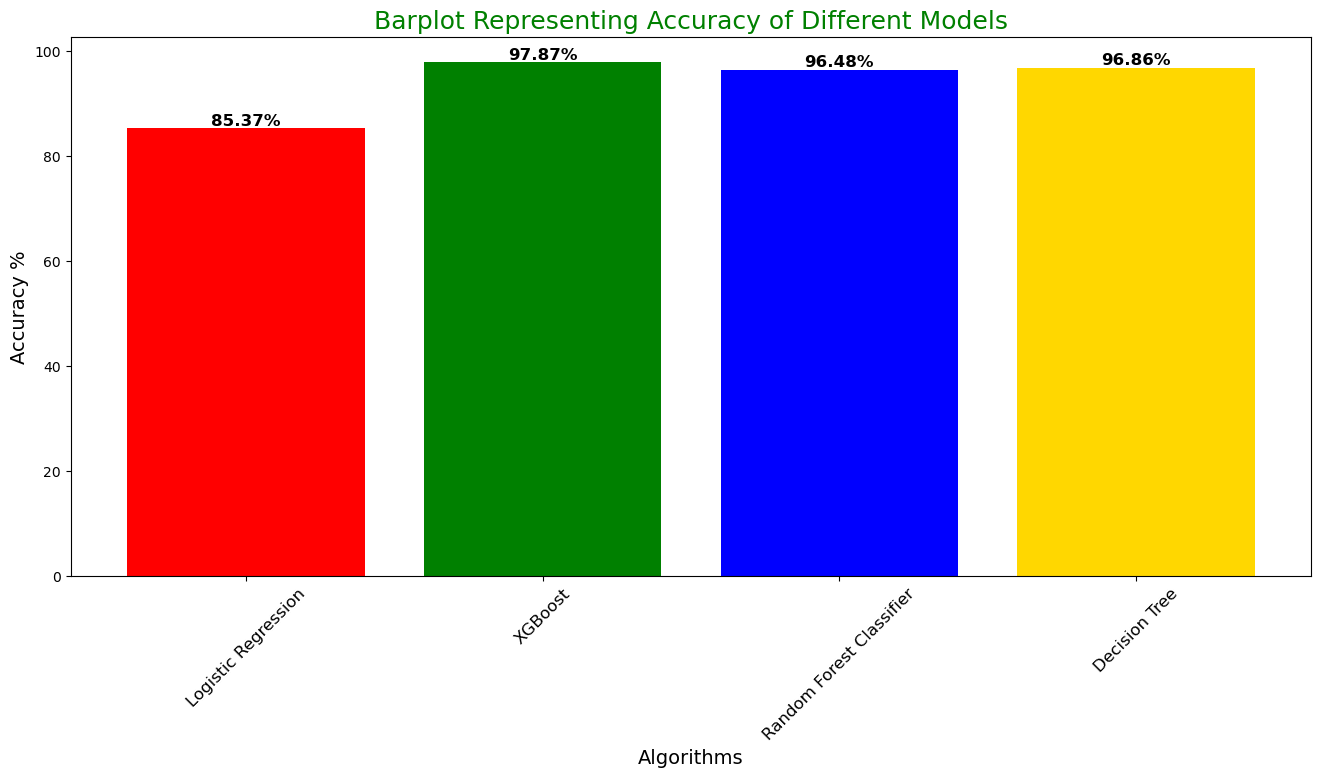

In [107]:

colors = ['red', 'green', 'blue', 'gold']

plt.figure(figsize=(16, 7))
plt.title("Barplot Representing Accuracy of Different Models",fontsize=18,color="green")
plt.xlabel("Algorithms",fontsize=14)
plt.ylabel("Accuracy %",fontsize=14)
plt.xticks(rotation=45,fontsize=12)  # Rotating for better visibility

# Creating the bar plot
bars = plt.bar(model_ev['Model'], model_ev['Accuracy'], color=colors)

# Adding labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,  # X-coordinate (center of the bar)
             bar.get_height(),                 # Y-coordinate (top of the bar)
             f"{bar.get_height():.2f}%",       # Text (formatted accuracy)
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()


In [108]:
# save model
with open('xgb_classifier.pkl','wb') as file:
    pickle.dump(xgb_classifier,file)